In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data=pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

In [3]:
data.head(1)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   

        product_rating       overall_rating     brand  \
0  No rating available  No rating available  Elegance   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...

In [4]:
text_data=data.copy()

# On commence par créer une liste de stopwords

## On commence par la colonne url

In [5]:
#On récupère les textes
import re
def url(name):
    return ' '.join(re.split(r'\/|\.|-|\\|%|:',name))
text_url=' '.join(text_data['product_url'].apply(lambda x:url(x)))

In [6]:
text_url

'http   www flipkart com elegance polyester multicolor abstract eyelet door curtain p itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z http   www flipkart com sathiyas cotton bath towel p itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH http   www flipkart com eurospa cotton terry face towel set p itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y http   www flipkart com santosh royal fashion cotton printed king sized double bedsheet p itmejt9uaqahahuf?pid=BDSEJT9UQWHDUBH4 http   www flipkart com jaipur print cotton floral king sized double bedsheet p itmejthnwahrnt7v?pid=BDSEJTHNGWVGWWQU http   www flipkart com maserati time r8851116001 analog watch boys p itmeayahfma4r9kp?pid=WATEAYAHJ8CUCAYM http   www flipkart com camerii wm64 elegance analog watch men boys p itme6y6duhfcummh?pid=WATE6Y6D2MZHWGBZ http   www flipkart com t star uft tsw 005 bk br analog watch boys p itmecffvcgfw8f9m?pid=WATECFFVGFZPAD3D http   www flipkart com alfajr wy16b youth digital watch men boys p itmechfufumwbtnz?pid=WATECHFU4QGFQEJG http   www

## Puis le nom du produit

In [7]:
text_name=' '.join(text_data['product_name'])


In [8]:
text_data['product_category_tree']

0       ["Home Furnishing >> Curtains & Accessories >>...
1       ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
2       ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
3       ["Home Furnishing >> Bed Linen >> Bedsheets >>...
4       ["Home Furnishing >> Bed Linen >> Bedsheets >>...
                              ...                        
1045    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1046    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1047    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1048    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1049    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
Name: product_category_tree, Length: 1050, dtype: object

In [9]:
text_data['product_category_tree']=\
text_data['product_category_tree'].apply(lambda x: re.split(r'\["|>>|"\]',x))

In [10]:
text_data['product_category_tree'].apply(lambda x: len(x)).describe()

count    1050.000000
mean        6.204762
std         1.158126
min         4.000000
25%         5.000000
50%         6.000000
75%         7.000000
max         9.000000
Name: product_category_tree, dtype: float64

In [11]:
text_data['product_category_tree'].iloc[12]

['', 'Watches ', ' Wrist Watches ', ' Lois Caron Wrist Watches', '']

In [12]:
#On a donc un maximum de 8 catégories

In [13]:
for i in range(1,9):
    cat='categorie '+str(i)
    text_data[cat]=text_data['product_category_tree'].apply(lambda x: '' if len(x)<=i else x[i])


In [14]:
text_data.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  [, Home Furnishing ,  Curtains & Accessories ,...  CRNEG7BKMFFYHQ8Z   
1  [, Baby Care ,  Baby Bath & Skin ,  Baby Bath ...  BTWEGFZHGBXPHZUH   
2  [, Baby Care ,  Baby Bath & Skin ,  Baby Bath ...  BTWEG6SHXTDB2A2Y   
3  [, Home Furnishing ,  Bed Linen ,  Bedsheets ,...  BDSEJT9UQWHDUBH4   
4  [, Home Furnishing ,  Bed Linen ,  Bedsheets ,...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product  ...                  brand  \
0                    False  ...               Elegance   
1                    False  ...               Sathiyas   
2                    False  ...                Eurospa   
3                    False  ...  SANTOSH ROYAL FASHION   
4                    False  ...           Jaipur Print   

                              product_specifications       categorie 1  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing    
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care    
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care    
3  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing    
4  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing    

                categorie 2         categorie 3  \
0   Curtains & Accessories            Curtains    
1         Baby Bath & Skin    Baby Bath Towels    
2         Baby Bath & Skin    Baby Bath Towels    
3                Bed Linen           Bedsheets    
4                Bed Linen           Bedsheets    

                                         categorie 4  \
0   Elegance Polyester Multicolor Abstract Eyelet...   
1                         Sathiyas Baby Bath Towels    
2                          Eurospa Baby Bath Towels    
3                   SANTOSH ROYAL FASHION Bedsheets    
4                            Jaipur Print Bedsheets    

                                         categorie 5 categorie 6 categorie 7  \
0                                                                              
1   Sathiyas Cotton Bath Towel (3 Bath Towel, Red...                           
2   Eurospa Cotton Terry Face Towel Set (20 PIECE...                           
3   SANTOSH ROYAL FASHION Cotton Printed King siz...                           
4   Jaipur Print Cotton Floral King sized Double ...                           

  categorie 8  
0              
1              
2              
3              
4              

[5 rows x 23 columns]

In [15]:
#On supprime des lignes inutiles pour l'étude du texte:
text_data.drop(['crawl_timestamp','pid','image','is_FK_Advantage_product'],axis=1,inplace=True)

In [16]:
text_categories=''
for i in range(1,9):
    cat='categorie '+str(i)
    text_categories+=' '
    text_categories+=' '.join(text_data[cat].unique())

In [17]:
text_categories

" Home Furnishing  Baby Care  Watches  Home Decor & Festive Needs  Kitchen & Dining  Beauty and Personal Care  Computers   Curtains & Accessories   Baby Bath & Skin   Bed Linen   Wrist Watches   Living Room Furnishing   Bath Linen   Candles & Fragrances   Tableware & Cutlery   Lighting   JMD Home Furnishing   Infant Wear   Kripa's Home Furnishing   Hair Care   Coffee Mugs   Network Components   Tablet Accessories   Cookware   Laptop Accessories   Makeup   Combos and Kits   Feeding & Nursing   Baby Bedding   Kitchen & Dining Linen   Containers & Bottles   Consumables & Disposables   Wall Decor & Clocks   Table Decor & Handicrafts   Flowers, Plants & Vases   Software   Showpieces   Furniture & Furnishings   Decorative Lighting & Lamps   Baby Grooming   Computer Peripherals   Cushions, Pillows & Covers   Storage   Health Care   Body and Skin Care   Kitchen Tools   TRUE Home Decor & Festive Needs  Living   Showpiece   Bar & Glassware   Fragrances   Women's Hygiene   Diapering & Potty Train

## On récupère les mots dans description

In [18]:
text_description=' '.join(text_data['description'])

In [19]:
text_description

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [20]:
text_data.head()

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   
1  7b72c92c2f6c40268628ec5f14c6d590   
2  64d5d4a258243731dc7bbb1eef49ad74   
3  d4684dcdc759dd9cdf41504698d737d8   
4  6325b6870c54cd47be6ebfbffa620ec7   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree  retail_price  \
0  [, Home Furnishing ,  Curtains & Accessories ,...        1899.0   
1  [, Baby Care ,  Baby Bath & Skin ,  Baby Bath ...         600.0   
2  [, Baby Care ,  Baby Bath & Skin ,  Baby Bath ...           NaN   
3  [, Home Furnishing ,  Bed Linen ,  Bedsheets ,...        2699.0   
4  [, Home Furnishing ,  Bed Linen ,  Bedsheets ,...        2599.0   

   discounted_price                                        description  \
0             899.0  Key Features of Elegance Polyester Multicolor ...   
1             449.0  Specifications of Sathiyas Cotton Bath Towel (...   
2               NaN  Key Features of Eurospa Cotton Terry Face Towe...   
3            1299.0  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4             698.0  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications       categorie 1  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing    
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care    
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care    
3  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing    
4  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing    

                categorie 2         categorie 3  \
0   Curtains & Accessories            Curtains    
1         Baby Bath & Skin    Baby Bath Towels    
2         Baby Bath & Skin    Baby Bath Towels    
3                Bed Linen           Bedsheets    
4                Bed Linen           Bedsheets    

                                         categorie 4  \
0   Elegance Polyester Multicolor Abstract Eyelet...   
1                         Sathiyas Baby Bath Towels    
2                          Eurospa Baby Bath Towels    
3                   SANTOSH ROYAL FASHION Bedsheets    
4                            Jaipur Print Bedsheets    

                                         categorie 5 categorie 6 categorie 7  \
0                                                                              
1   Sathiyas Cotton Bath Towel (3 Bath Towel, Red...                           
2   Eurospa Cotton Terry Face Towel Set (20 PIECE...                           
3   SANTOSH ROYAL FASHION Cotton Printed King siz...                           
4   Jaipur Print Cotton Floral King sized Double ...                           

  categorie 8  
0              
1              
2              
3              
4

In [21]:
text_data.drop(['overall_rating','product_rating'],axis=1,inplace=True)

## On passe à la spécification produit

In [22]:
text_data['product_specifications'].unique()

array(['{"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Designed For", "value"=>"Door"}, {"key"=>"Type", "value"=>"Eyelet"}, {"key"=>"Model Name", "value"=>"Abstract Polyester Door Curtain Set Of 2"}, {"key"=>"Model ID", "value"=>"Duster25"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Length", "value"=>"213 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 2"}, {"key"=>"Sales Package", "value"=>"2 Curtains"}, {"key"=>"Material", "value"=>"Polyester"}]}',
       '{"product_specification"=>[{"key"=>"Machine Washable", "value"=>"Yes"}, {"key"=>"Material", "value"=>"Cotton"}, {"key"=>"Design", "value"=>"Self Design"}, {"key"=>"Brand", "value"=>"Sathiyas"}, {"key"=>"Type", "value"=>"Bath Towel"}, {"key"=>"GSM", "value"=>"500"}, {"key"=>"Model Name", "value"=>"Sathiyas cotton bath towel"}, {"key"=>"Ideal For", "value"=>"Men, Women, Boys, Girls"}, {"key"=>"Model ID", "value"=>"asvtwl322"}, {"key"=>"Color", "value"=>"Red, Yellow, Blue"}, {

In [23]:
def dico(x):
    d={}
    pattern=re.compile(r'"key"=>"(\w+)", "value"=>"(\w+)"')
    matches=pattern.findall(x)
    for i in matches:
        d[i[0]]=i[1]
    return d


In [24]:
def spec(x):
    pattern=re.compile(r'=>"(\w+)"')
    matches=pattern.findall(x)
    return ' '.join(matches)

In [25]:
text_data.head()

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   
1  7b72c92c2f6c40268628ec5f14c6d590   
2  64d5d4a258243731dc7bbb1eef49ad74   
3  d4684dcdc759dd9cdf41504698d737d8   
4  6325b6870c54cd47be6ebfbffa620ec7   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree  retail_price  \
0  [, Home Furnishing ,  Curtains & Accessories ,...        1899.0   
1  [, Baby Care ,  Baby Bath & Skin ,  Baby Bath ...         600.0   
2  [, Baby Care ,  Baby Bath & Skin ,  Baby Bath ...           NaN   
3  [, Home Furnishing ,  Bed Linen ,  Bedsheets ,...        2699.0   
4  [, Home Furnishing ,  Bed Linen ,  Bedsheets ,...        2599.0   

   discounted_price                                        description  \
0             899.0  Key Features of Elegance Polyester Multicolor ...   
1             449.0  Specifications of Sathiyas Cotton Bath Towel (...   
2               NaN  Key Features of Eurospa Cotton Terry Face Towe...   
3            1299.0  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4             698.0  Key Features of Jaipur Print Cotton Floral Kin...   

                   brand                             product_specifications  \
0               Elegance  {"product_specification"=>[{"key"=>"Brand", "v...   
1               Sathiyas  {"product_specification"=>[{"key"=>"Machine Wa...   
2                Eurospa  {"product_specification"=>[{"key"=>"Material",...   
3  SANTOSH ROYAL FASHION  {"product_specification"=>[{"key"=>"Brand", "v...   
4           Jaipur Print  {"product_specification"=>[{"key"=>"Machine Wa...   

        categorie 1               categorie 2         categorie 3  \
0  Home Furnishing    Curtains & Accessories            Curtains    
1        Baby Care          Baby Bath & Skin    Baby Bath Towels    
2        Baby Care          Baby Bath & Skin    Baby Bath Towels    
3  Home Furnishing                 Bed Linen           Bedsheets    
4  Home Furnishing                 Bed Linen           Bedsheets    

                                         categorie 4  \
0   Elegance Polyester Multicolor Abstract Eyelet...   
1                         Sathiyas Baby Bath Towels    
2                          Eurospa Baby Bath Towels    
3                   SANTOSH ROYAL FASHION Bedsheets    
4                            Jaipur Print Bedsheets    

                                         categorie 5 categorie 6 categorie 7  \
0                                                                              
1   Sathiyas Cotton Bath Towel (3 Bath Towel, Red...                           
2   Eurospa Cotton Terry Face Towel Set (20 PIECE...                           
3   SANTOSH ROYAL FASHION Cotton Printed King siz...                           
4   Jaipur Print Cotton Floral King sized Double ...                           

  categorie 8  
0              
1              
2              
3              
4

In [26]:
def spec(x):
    pattern=re.compile(r'=>"(\w+)"')
    matches=pattern.findall(x)
    return ' '.join(matches)
text_data['product_specifications'].fillna('').apply(lambda x:spec(x))
spec_words=' '.join(text_data['product_specifications'].fillna('').apply(lambda x:spec(x)))

In [27]:
spec_words=' '.join(text_data['product_specifications'].fillna('').apply(lambda x:spec(x)))

# On va essayer de ne regarder qu'avec name et specifications:

In [28]:
#Ca y est j'ai récupéré tous les mots qui m'intéréssaient
#je les concatène:
words=(spec_words+' '+text_name).lower()

In [29]:
#On va passer par regex pour supprimer les nombres seuls et les ponctuations 
#??(Je veux conserver les 4d ou A5)??
import nltk
sw = set()
sw.update(tuple(nltk.corpus.stopwords.words('english')))
tokenizer = nltk.RegexpTokenizer(r'[A-Za-z0-9]{2,}')
corpus=tokenizer.tokenize(words)

In [30]:
len(corpus)

18571

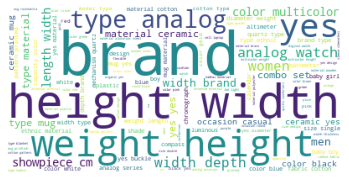

In [31]:
#Je regarde les fréquences:


from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=sw, background_color="white")
wordcloud.generate(" ".join(corpus))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [32]:
text_data['categorie 1'].unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

In [33]:
freq_words=['brand']

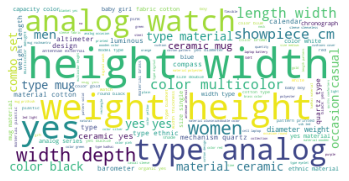

In [34]:
sw.update(tuple(freq_words))

#On regarde à nouveau:
wordcloud.generate(" ".join(corpus))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()



In [35]:

#on garde rs par exemple, marque de composant électronique et cm qui peut représenter une discrimination entre catégorie
freq_words=['yes','men','women','type']
len(sw)

180

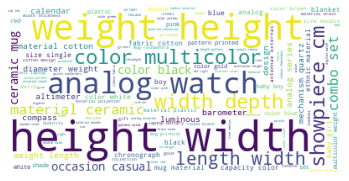

In [36]:
sw.update(tuple(freq_words))

#On regarde à nouveau:
wordcloud.generate(" ".join(corpus))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


#on garde rs par exemple, marque de composant électronique et cm qui peut représenter une discrimination entre catégorie

In [37]:
freq_words=['height','weight','width','multicolor','color','black','length','showpiece','depth']
len(sw)

184

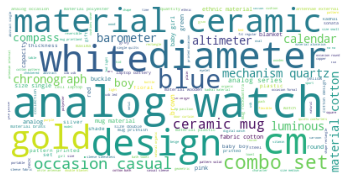

In [38]:
sw.update(tuple(freq_words))

#On regarde à nouveau:
wordcloud.generate(" ".join(corpus))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


#on garde rs par exemple, marque de composant électronique et cm qui peut représenter une discrimination entre catégorie

In [39]:
freq_words=['blue','occasion','casual','brown','red','gold','pink','green','white']
len(sw)

193

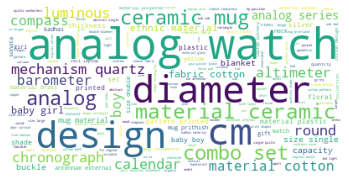

In [40]:
sw.update(tuple(freq_words))

#On regarde à nouveau:
wordcloud.generate(" ".join(corpus))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


#on garde rs par exemple, marque de composant électronique et cm qui peut représenter une discrimination entre catégorie

In [41]:
freq_words=['occasion','casual','yes']
len(sw)

202

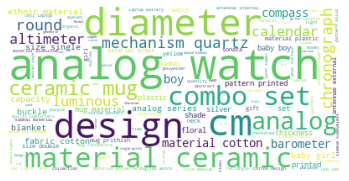

In [42]:
#Maintenant que l'on a notre base de stopwords, on va passer à la lemmetization/stemmeatisation
sw.update(tuple(freq_words))

#On regarde à nouveau:
wordcloud.generate(" ".join(corpus))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


#on garde rs par exemple, marque de composant électronique et cm qui peut représenter une discrimination entre catégorie

In [43]:
freq_words=['white','black','color']
len(sw)

202

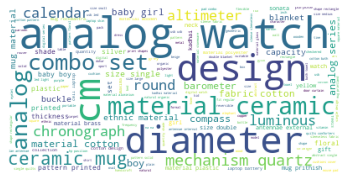

In [44]:
#Maintenant que l'on a notre base de stopwords, on va passer à la lemmetization/stemmeatisation
sw.update(tuple(freq_words))

#On regarde à nouveau:
wordcloud.generate(" ".join(corpus))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


#on garde rs par exemple, marque de composant électronique et cm qui peut représenter une discrimination entre catégorie

In [45]:
#Il y a des mots agglomérés dans le corpus, on les regarde:
long=[]
for i in corpus:
    if len(i)>10 and i not in long:
        long.append(i)
len(long)

128

In [46]:
long

['shuvam20pcftsetassorted',
 'chronograph',
 'r8851116001',
 'contemporary',
 'embroidered',
 'bnw3x10rlgla',
 'temperature',
 'certification',
 'conditioning',
 'replacement',
 'multicolour',
 'hgfvscgstgry00094',
 'eternity001007',
 'composition',
 'mb1043sf4056',
 'tabledecorativebowl1',
 'polypropylene',
 'shoppingtara',
 'interiordesign',
 'tiedribbons',
 'mothersdaytile041',
 'maganbuddha',
 'paniarakkal',
 'mothersdaytile024',
 'ruchikainternational',
 '10btsc2012gb',
 'dreamshomes',
 'jayenterprise',
 'homedesires',
 'brilliantcolor',
 'multipurpose',
 'scalabedding',
 'aci20160340',
 'giftsthatwow',
 '56213kls215',
 '56213kls213',
 '56213kls230',
 'ideapadl08o6c02',
 'lgswatches760sl',
 'illuminator',
 'mayursflora',
 'randmshoppee',
 'boysiigirls',
 's16184wbz006',
 'transparency',
 '8904214703639',
 'architecture',
 'hzcn0500541',
 'bornbabykids',
 'handloomhub',
 'pinkpolkahat',
 'rectangular',
 '929001120614',
 'polycarbonate',
 'houseattire',
 'rajasthanikart',
 'golmaals

# Nettoyage complémentaire

In [47]:
#On va comparer plusieurs options sur qq lignes du tableau pour sélectionner celui qui nous semble le plus
#pertinent:
text_data.head(1)

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   

                               product_category_tree  retail_price  \
0  [, Home Furnishing ,  Curtains & Accessories ,...        1899.0   

   discounted_price                                        description  \
0             899.0  Key Features of Elegance Polyester Multicolor ...   

      brand                             product_specifications  \
0  Elegance  {"product_specification"=>[{"key"=>"Brand", "v...   

        categorie 1               categorie 2 categorie 3  \
0  Home Furnishing    Curtains & Accessories    Curtains    

                                         categorie 4 categorie 5 categorie 6  \
0   Elegance Polyester Multicolor Abstract Eyelet...                           

  categorie 7 categorie 8  
0

In [48]:
text_data.isnull().sum()

uniq_id                     0
product_url                 0
product_name                0
product_category_tree       0
retail_price                1
discounted_price            1
description                 0
brand                     338
product_specifications      1
categorie 1                 0
categorie 2                 0
categorie 3                 0
categorie 4                 0
categorie 5                 0
categorie 6                 0
categorie 7                 0
categorie 8                 0
dtype: int64

In [49]:
#On commence par regrouper dans une colonne l'ensemble des mots de chaque ligne dont on a enlevé les stopwords:

def cleaning(name,specs):
    name_clean = name
    spec_clean=spec(specs)
    words = ' '.join([name_clean, spec_clean])
    words_clean = re.sub('[^A-Za-z ]',' ', words) #au final j'enlève les mots avec des nombres
    words_clean = re.sub('\s+',' ', words_clean) #j'enlève les espaces en trop
    words_list = words_clean.split(' ')
    return ' '.join([w.lower() for w in words_list if w not in sw])

In [50]:
text_data['words_string'] = np.vectorize(cleaning)(text_data['product_name'], \
                                                   text_data['product_specifications'].fillna(''))
text_data.head()

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   
1  7b72c92c2f6c40268628ec5f14c6d590   
2  64d5d4a258243731dc7bbb1eef49ad74   
3  d4684dcdc759dd9cdf41504698d737d8   
4  6325b6870c54cd47be6ebfbffa620ec7   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree  retail_price  \
0  [, Home Furnishing ,  Curtains & Accessories ,...        1899.0   
1  [, Baby Care ,  Baby Bath & Skin ,  Baby Bath ...         600.0   
2  [, Baby Care ,  Baby Bath & Skin ,  Baby Bath ...           NaN   
3  [, Home Furnishing ,  Bed Linen ,  Bedsheets ,...        2699.0   
4  [, Home Furnishing ,  Bed Linen ,  Bedsheets ,...        2599.0   

   discounted_price                                        description  \
0             899.0  Key Features of Elegance Polyester Multicolor ...   
1             449.0  Specifications of Sathiyas Cotton Bath Towel (...   
2               NaN  Key Features of Eurospa Cotton Terry Face Towe...   
3            1299.0  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4             698.0  Key Features of Jaipur Print Cotton Floral Kin...   

                   brand                             product_specifications  \
0               Elegance  {"product_specification"=>[{"key"=>"Brand", "v...   
1               Sathiyas  {"product_specification"=>[{"key"=>"Machine Wa...   
2                Eurospa  {"product_specification"=>[{"key"=>"Material",...   
3  SANTOSH ROYAL FASHION  {"product_specification"=>[{"key"=>"Brand", "v...   
4           Jaipur Print  {"product_specification"=>[{"key"=>"Machine Wa...   

        categorie 1               categorie 2         categorie 3  \
0  Home Furnishing    Curtains & Accessories            Curtains    
1        Baby Care          Baby Bath & Skin    Baby Bath Towels    
2        Baby Care          Baby Bath & Skin    Baby Bath Towels    
3  Home Furnishing                 Bed Linen           Bedsheets    
4  Home Furnishing                 Bed Linen           Bedsheets    

                                         categorie 4  \
0   Elegance Polyester Multicolor Abstract Eyelet...   
1                         Sathiyas Baby Bath Towels    
2                          Eurospa Baby Bath Towels    
3                   SANTOSH ROYAL FASHION Bedsheets    
4                            Jaipur Print Bedsheets    

                                         categorie 5 categorie 6 categorie 7  \
0                                                                              
1   Sathiyas Cotton Bath Towel (3 Bath Towel, Red...                           
2   Eurospa Cotton Terry Face Towel Set (20 PIECE...                           
3   SANTOSH ROYAL FASHION Cotton Printed King siz...                           
4   Jaipur Print Cotton Floral King sized Double ...                           

  categorie 8                                       words_string  
0              elegance polyester multicolor abstract eyelet ...  
1              sathiyas cotton bath towel yes material cotton...  
2              eurospa cotton terry face towel set material d...  
3              santosh royal fashion cotton printed king size...  
4              jaipur print cotton floral king sized double b...

In [51]:
new_corpus=' '.join(text_data['words_string'])

In [52]:
new_corpus

'elegance polyester multicolor abstract eyelet door curtain brand elegance door type eyelet duster color multicolor length material polyester sathiyas cotton bath towel yes material cotton design brand sathiyas type gsm asvtwl color size mediam length width  eurospa cotton terry face towel set material design shuvam brand eurospa gsm type shuvam pcftsetassorted shuvam pcftsetassorted size small color assorted weight length width  santosh royal fashion cotton printed king sized double bedsheet brand yes type flat material cotton color multicolor size king  jaipur print cotton floral king sized double bedsheet yes brand type flat jaipur material cotton jaipur size king color white weight  maserati time r analog watch for boys chronograph yes altimeter no barometer no no compass no calendar no luminous no type analog r boys occasion oval green no yes grey camerii wm elegance analog watch for men boys chronograph no no altimeter no barometer no no compass no calendar no luminous no mechani

In [53]:
#Il y a pas mal de mots soit fusionné soient issuent probablement des adresses url
#on va traiter cela
#je re tokenize
corpus=nltk.word_tokenize(new_corpus)

In [54]:
len(corpus)

18231

In [55]:
pd.Series(corpus).value_counts().describe()

count    2464.000000
mean        7.398945
std        36.047094
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       761.000000
dtype: float64

In [56]:
#on va commencer par enlever les long string qui ne veulent rien dire:
L=[]
for i in corpus:
    if len(i)>12 and i not in L:
        L.append(i)
L

['pcftsetassorted',
 'certification',
 'goldencollections',
 'intrferential',
 'electrotherapy',
 'illustrations',
 'pscychological',
 'multicoloured',
 'tabledecorativebowl',
 'polypropylene',
 'interiordesign',
 'international',
 'mothersdaytile',
 'ruchikainternational',
 'jayenterprise',
 'brilliantcolor',
 'multifunctional',
 'polycarbonate',
 'rajasthanikart',
 'srprbhganfrovl',
 'ccsmallfloral',
 'zeflowerbtton',
 'bttonflwrbeigerust',
 'msenterprises',
 'furnishingland',
 'mediterranean']

In [57]:
def cleaning(x):
    #on traite les mots individuellement
    x=re.sub(r'pcftsetassorted','pc ft set assorted',x)
    x=re.sub('goldencollections','golden collection',x)
    x=re.sub('intrferential','interferential',x)
    x=re.sub('tabledecorativebowl','table decorative bowl',x)
    x=re.sub('interiorsdesign','interior design',x)
    x=re.sub('mothersdaytile','mother day tile',x)
    x=re.sub('brilliantcolor','brilliant color',x)
    x=re.sub('srprbhganfrovl','',x)
    x=re.sub('ccsmallfloral','cc small floral',x)
    x=re.sub('bttonflwrbeigerust','button flower',x)
    x=re.sub('zeflowerbtton','flower button',x)
    return x

In [58]:
new_corpus=cleaning(new_corpus)
corpus=nltk.word_tokenize(new_corpus)
L=[]
for i in corpus:
    if len(i)>12:
        L.append(i)
L

['certification',
 'interferential',
 'electrotherapy',
 'illustrations',
 'pscychological',
 'multicoloured',
 'polypropylene',
 'interiordesign',
 'interiordesign',
 'international',
 'international',
 'international',
 'ruchikainternational',
 'ruchikainternational',
 'ruchikainternational',
 'ruchikainternational',
 'jayenterprise',
 'jayenterprise',
 'certification',
 'certification',
 'certification',
 'certification',
 'certification',
 'certification',
 'certification',
 'certification',
 'certification',
 'multifunctional',
 'certification',
 'polycarbonate',
 'rajasthanikart',
 'rajasthanikart',
 'msenterprises',
 'msenterprises',
 'international',
 'furnishingland',
 'furnishingland',
 'furnishingland',
 'furnishingland',
 'furnishingland',
 'furnishingland',
 'mediterranean',
 'polypropylene',
 'polypropylene']

In [59]:
#On applique ce cleaning à la colonne de texte:
text_data['words_string']=text_data['words_string'].apply(lambda x:cleaning(x))

##  Stemming/Lemmatization

In [60]:
test_data=text_data.sample(10)
test_data['categorie 1'].unique()

array(['Baby Care ', 'Computers ', 'Kitchen & Dining ',
       'Home Decor & Festive Needs ', 'Watches '], dtype=object)

In [61]:
#On a toutes les catégories
#on récupère le texte
test='\n'.join(test_data['words_string'])

In [62]:
test

'shaun solid baby boy grey dark blue track pants fabric cotton pockets pattern solid btp xn\nprint shapes despicable looking upwards laptop skin mouse pad combo set brand suitable color multicolor\nprintland pmr ceramic mug type mug material ceramic yes yes weight\nfeetje trousers pattern printed occasion casual color blue fabric\nlal haveli beautiful attractive hand painted decorative iron wood musician pcs set showpiece cm brand hnd type ethnic material color multicolor height width \nmegaway inch white rice lights brand megaway mwlfl led length color white \ngift island ast analog watch for women chronograph no altimeter no no barometer no no compass no calendar no luminous no type analog ast occasion casual women round blue yes no beige\nrockmantra d stone ceramic mug type mug yes material ceramic yes diameter weight height width\nzyxel vmg b a vdsl wireless n vdsl port gateway usb brand zyxel model type color black antennae internal\nmetallino hard anodised kadhai l curry no brand

In [63]:
#testons plusieurs Stemmer et voyons ce que ça donne:

#Stemmer
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer

stem=LancasterStemmer()

def modif(texte,stemmer):
    count=0
    dico={}
    for mot in nltk.word_tokenize(texte):
        stemm=stemmer
        m=stemm.stem(mot)
        if m!=mot:
            count+=1
            if m in dico:
                if mot not in dico[m]:
                    dico[m].append(mot)
            else :
                dico[m]=[mot]
    
    return len(dico),count
               



In [64]:
L=[LancasterStemmer(),PorterStemmer(),SnowballStemmer("english")]
Name=['Lancaster','Porter','Snowball']

for i in range(3):
    print(Name[i],modif(test,L[i]))

Lancaster (49, 81)
Porter (34, 47)
Snowball (32, 40)


In [65]:
#Lancaster parait plus efficace mais regardons les différences:
def modif2(texte):
    L=[LancasterStemmer(),PorterStemmer(),SnowballStemmer("english")]
    Name=['Lancaster','Porter','Snowball']
    dico={}
    for i in range(3):
        count=0
        for mot in nltk.word_tokenize(texte):
            stemm=L[i]
            m=stemm.stem(mot)
            if m!=mot:
                if mot in dico:
                    if Name[i] not in dico[mot]:
                        dico[mot][Name[i]]=m
                else:
                    dico[mot]={Name[i]:m}
    
    return dico


In [66]:
modif2(test)

{'blue': {'Lancaster': 'blu'},
 'pants': {'Lancaster': 'pant', 'Porter': 'pant', 'Snowball': 'pant'},
 'fabric': {'Lancaster': 'fabr'},
 'pockets': {'Lancaster': 'pocket', 'Porter': 'pocket', 'Snowball': 'pocket'},
 'shapes': {'Lancaster': 'shap', 'Porter': 'shape', 'Snowball': 'shape'},
 'despicable': {'Lancaster': 'desp', 'Porter': 'despic', 'Snowball': 'despic'},
 'looking': {'Lancaster': 'look', 'Porter': 'look', 'Snowball': 'look'},
 'upwards': {'Lancaster': 'upward', 'Porter': 'upward', 'Snowball': 'upward'},
 'mouse': {'Lancaster': 'mous', 'Porter': 'mous', 'Snowball': 'mous'},
 'suitable': {'Lancaster': 'suit', 'Porter': 'suitabl', 'Snowball': 'suitabl'},
 'color': {'Lancaster': 'col'},
 'multicolor': {'Lancaster': 'multicol'},
 'ceramic': {'Lancaster': 'ceram', 'Porter': 'ceram', 'Snowball': 'ceram'},
 'type': {'Lancaster': 'typ'},
 'material': {'Lancaster': 'mat', 'Porter': 'materi', 'Snowball': 'materi'},
 'yes': {'Lancaster': 'ye', 'Porter': 'ye'},
 'feetje': {'Lancaster': 

In [67]:
#On part sur Lancaster

In [68]:
#Voyons avec les Lemmetizer:
#Lemmetizer:
from nltk.stem import WordNetLemmatizer
from textblob import Word,TextBlob
from gensim.utils import lemmatize


lem=WordNetLemmatizer()
dico={}
countWN=0
countTB=0
countGEN=0
for t in test.split():
    if lem.lemmatize(t)!=t:
        countWN+=1
        if t not in dico:
            dico[t]={'WordNet':lem.lemmatize(t)}
    
    w = Word(t)
    if w.lemmatize()!=t:
        countTB+=1
        if t not in dico:
            dico[t]={'TextBlob':w.lemmatize()}
        else:
            dico[t]['TextBlob']=w.lemmatize()
            
print('Wordnet:',countWN,'\t','TextBlob',countTB)
print(dico)




Wordnet: 9 	 TextBlob 9
{'pants': {'WordNet': 'pant', 'TextBlob': 'pant'}, 'pockets': {'WordNet': 'pocket', 'TextBlob': 'pocket'}, 'shapes': {'WordNet': 'shape', 'TextBlob': 'shape'}, 'trousers': {'WordNet': 'trouser', 'TextBlob': 'trouser'}, 'pcs': {'WordNet': 'pc', 'TextBlob': 'pc'}, 'lights': {'WordNet': 'light', 'TextBlob': 'light'}, 'women': {'WordNet': 'woman', 'TextBlob': 'woman'}, 'antennae': {'WordNet': 'antenna', 'TextBlob': 'antenna'}}


In [69]:
#On a les même résultats
#On va essayer avant après:

lem=WordNetLemmatizer()
def modifapres(texte,stemmer):
    count,count2=0,0
    dico={}
    for mot in nltk.word_tokenize(texte):
        stemm=stemmer
        m=stemm.stem(mot)
        if m!=mot:
            count+=1
            if lem.lemmatize(m)!=m:
                count2+=1
        else:
            if lem.lemmatize(mot)!=mot:
                count2+=1

    return count,count2

def modifavant(texte,stemmer):
    
    count,count2=0,0
    
    dico={}
    for mot in nltk.word_tokenize(texte):
        m=lem.lemmatize(mot)
        stemm=stemmer
        if m!=mot:
            count2+=1
            st=stemm.stem(m)
            if st!=m:
                count+=1
        elif stemm.stem(mot)!=mot:
            count+=1
    return(count,count2)


In [70]:
L=[LancasterStemmer(),PorterStemmer(),SnowballStemmer("english")]
Name=['Lancaster','Porter','Snowball']

for i in range(3):
    print('avant',Name[i],modifavant(test,L[i]))
    print('apres',Name[i],modifapres(test,L[i]))

avant Lancaster (78, 9)
apres Lancaster (81, 4)
avant Porter (40, 9)
apres Porter (47, 2)
avant Snowball (34, 9)
apres Snowball (40, 3)


In [71]:
text_data.head(1)

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   

                               product_category_tree  retail_price  \
0  [, Home Furnishing ,  Curtains & Accessories ,...        1899.0   

   discounted_price                                        description  \
0             899.0  Key Features of Elegance Polyester Multicolor ...   

      brand                             product_specifications  \
0  Elegance  {"product_specification"=>[{"key"=>"Brand", "v...   

        categorie 1               categorie 2 categorie 3  \
0  Home Furnishing    Curtains & Accessories    Curtains    

                                         categorie 4 categorie 5 categorie 6  \
0   Elegance Polyester Multicolor Abstract Eyelet...                           

  categorie 7 categorie 8                                       words_string  
0                          elegance polyester multicolor abstract eyelet ...

In [72]:
#COnclusion on va d'abord faire un stemmer puis un lemmetizer
#On va essayer Lancaster puis Porter.
#on va essayer de tracer tout cela:
#D'abod avec une simple TF-IDF:

stemmer=LancasterStemmer()

def reduced_tokens(tokens, stemmer):
    #J'applique d'abord WordNetLemmatizer puis le stemmer
    stemmed = []
    for item in tokens:
        stemmed.append(lem.lemmatize(stemmer.stem(item)))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = reduced_tokens(tokens, stemmer)
    return stems

bags=text_data[['categorie 1','words_string']].copy()


bags['words_string']=bags['words_string'].apply(lambda x:tokenize(x))
bags['words_string']=bags['words_string'].apply(lambda x:' '.join(x))

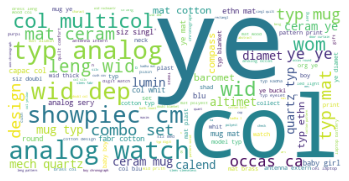

In [73]:
#On va encore un peu enrichir notre base de stopwords:

#On regarde à nouveau:
wordcloud.generate(" ".join(bags['words_string']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


#on garde rs par exemple, marque de composant électronique et cm qui peut représenter une discrimination entre catégorie


In [74]:
freq_words=['ye','col','leng','wom','typ','showpiec','whit','occas','blu','multicol']
sw.update(tuple(freq_words))


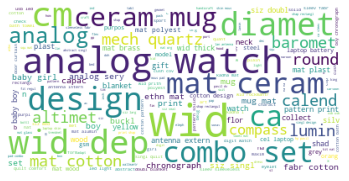

In [75]:
#On regarde à nouveau:
wordcloud.generate(" ".join(bags['words_string']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [76]:
bags.head()

categorie 1                                       words_string
0  Home Furnishing   eleg polyest multicol abstract eyelet door cur...
1        Baby Care   sathiya cotton bath towel ye mat cotton design...
2        Baby Care   eurosp cotton terry fac towel set mat design s...
3  Home Furnishing   santosh roy fash cotton print king siz doubl b...
4  Home Furnishing   jaip print cotton flor king siz doubl bedsheet...

In [77]:
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'black',
 'blu',
 'blue',
 'both',
 'brand',
 'brown',
 'but',
 'by',
 'can',
 'casual',
 'col',
 'color',
 'couldn',
 "couldn't",
 'd',
 'depth',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'gold',
 'green',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'height',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'leng',
 'length',
 'll',
 'm',
 'ma',
 'me',
 'men',
 'mightn',
 "mightn't",
 'more',
 'most',
 'multicol',
 'multicolor',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'n

In [78]:
bags['categorie 1'].unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

In [79]:
def cat(x):
    if x=='Home Furnishing ':
        return 1
    if x=='Kitchen & Dining ':
        return 2
    if x=='Computers ':
        return 3
    if x=='Beauty and Personal Care ':
        return 4
    if x=='Watches ':
        return 5
    if x=='Baby Care ':
        return 6
    else:
        return 7

In [80]:
bags['cluster']=bags['categorie 1'].apply(lambda x:cat(x))

In [81]:
bags['cluster'][i]

6

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize,stop_words=sw)
values = tfidf.fit_transform(bags['words_string'])


/home/samuel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [83]:
#C'est pas mal mais on va essayer de réduire la dimension:
X=values.toarray()

In [84]:
tsne=TSNE(n_components=2)
X_trans=tsne.fit_transform(X)

In [85]:
print(X)
print(X.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1050, 2122)


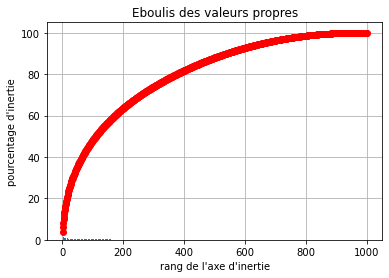

In [86]:
from sklearn import decomposition
from sklearn.decomposition import PCA
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.grid()
    plt.show(block=False)
    
pca = decomposition.PCA(n_components=1000)
pca.fit(X)
display_scree_plot(pca)

In [87]:
pca = decomposition.PCA(n_components=400)
pca.fit(X)
X_proj = pca.transform(X)
print(X_proj.shape)

(1050, 400)


In [88]:
X_trans=tsne.fit_transform(X_proj)

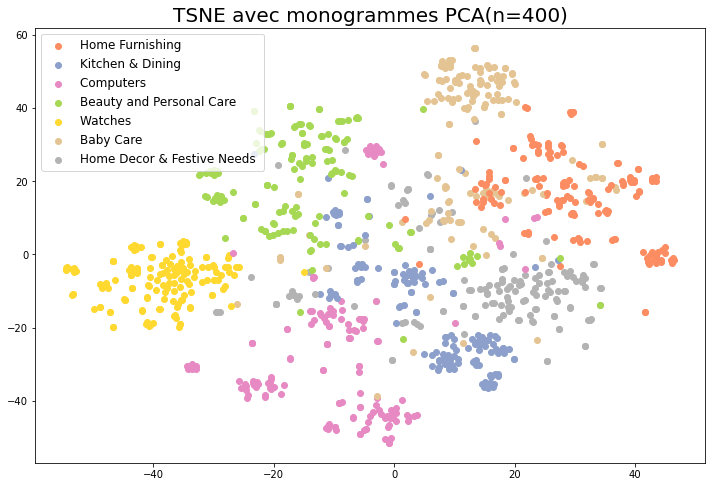

In [89]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(12,8))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '),loc='upper left',prop={'size':12})
plt.title('TSNE avec monogrammes PCA(n=400)',size=20)
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

In [90]:
#Au final on a un mélange non étonnant des catégories plus esthétiques
#On va regarder en enlevant les mots qui apparaissent très rarement et on éssaiera également de traiter le corpus
#avec des 2-grammes ou des 3-grammes voir si cela change quelque chose





In [91]:
bags.groupby('cluster')['words_string'].count()

cluster
1    150
2    150
3    150
4    150
5    150
6    150
7    150
Name: words_string, dtype: int64

In [92]:
#On a donc exactement 150 item par catégorie
#regardons la fréquence de répartition des mots:
texte_complet=' '.join(bags['words_string'])
d={}
for i in nltk.word_tokenize(texte_complet):
    if i not in d:
        d[i]=1
    else:
        d[i]+=1

In [93]:
len(d)

2185

In [94]:
#On va supprimer les mots présents moins de 10 fois (non vraiment représentatif d'un groupe)
#On va aussi supprimer ceux présents plus de 600 fois

In [95]:
sw2=[]
for i in d.keys():
    if d[i]<5:
        sw2.append(i)
len(sw2)

1718

In [96]:
#On met à jour nos bag of wrods avec ces nouveaux stop words:
sw2+=sw

In [97]:
len(sw2)

1930

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize,stop_words=sw2)
values = tfidf.fit_transform(bags['words_string'])


/home/samuel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [99]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2)

In [100]:
X_trans=tsne.fit_transform(values)

In [101]:
X_trans

array([[-25.648989 , -22.399784 ],
       [-20.369389 ,   5.859542 ],
       [ -4.537786 ,   7.29293  ],
       ...,
       [-11.010904 ,   6.9387593],
       [-11.471275 ,   4.2035313],
       [-10.995867 ,   5.7431297]], dtype=float32)

In [102]:
#c'est un peu moins mélangé, on va tenter les PCA et NMF voir ce que cela donne:


In [103]:
#C'est pas mal mais on va essayer de réduire la dimension:
X=values.toarray()

In [104]:
print(X)
print(X.shape)

[[0.18482851 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(1050, 431)


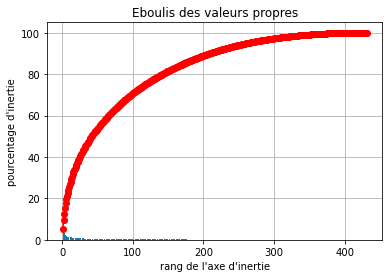

In [105]:
from sklearn import decomposition
from sklearn.decomposition import PCA
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.grid()
    plt.show(block=False)
    
pca = decomposition.PCA(n_components=431)
pca.fit(X)
display_scree_plot(pca)

In [106]:
pca = decomposition.PCA(n_components=200)
pca.fit(X)
X_proj = pca.transform(X)
print(X_proj.shape)

(1050, 200)


In [107]:
X_trans=tsne.fit_transform(X_proj)

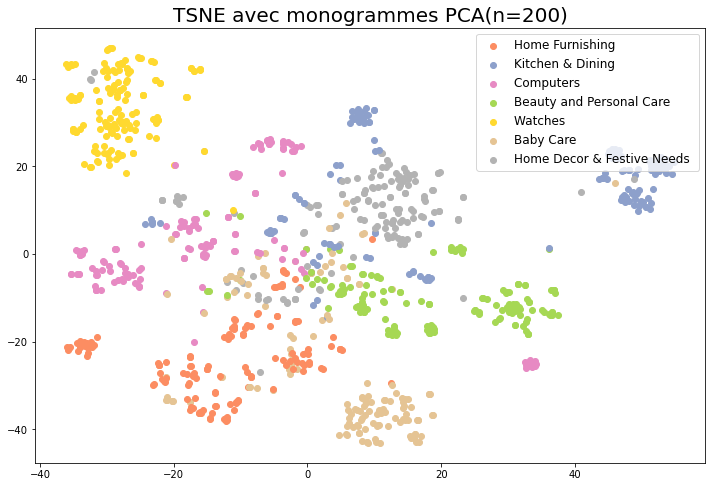

In [108]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(12,8))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '),loc='upper right',prop={'size':12})
plt.title('TSNE avec monogrammes PCA(n=200)',size=20)
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

In [109]:
#On essai également en enlevant les mots présents plus de 600 fois voir ce que cela donne:

In [110]:
sw2=[]
for i in d.keys():
    if d[i]<5 or d[i]>300:
        sw2.append(i)
len(sw2)

1726

In [111]:
sw2

['brand',
 'typ',
 'dust',
 'col',
 'mat',
 'sathiya',
 'ye',
 'asvtwl',
 'mediam',
 'wid',
 'eurosp',
 'terry',
 'shuvam',
 'ft',
 'weight',
 'santosh',
 'maserat',
 'no',
 'cameri',
 'wm',
 'star',
 'uft',
 'tsw',
 'bk',
 'br',
 'alfajr',
 'wy',
 'rib',
 'mesh',
 'tag',
 'heu',
 'cau',
 'formul',
 'clasp',
 'calibro',
 'sw',
 'carty',
 'loi',
 'caron',
 'lcs',
 'tit',
 'srusht',
 'jewelry',
 'megnet',
 'blackr',
 'escort',
 'blk',
 'jack',
 'klein',
 'blackl',
 'nor',
 'moon',
 'iw',
 'fk',
 'ion',
 'autom',
 'franck',
 'bell',
 'rida',
 'apl',
 'skmei',
 'ad',
 'now',
 'sp',
 'dg',
 'fastrack',
 'wq',
 'qibl',
 'disney',
 'dw',
 'viz',
 'belt',
 'elantr',
 'marvel',
 'lenco',
 'bdblue',
 'tango',
 'sign',
 'gm',
 'wht',
 'anlaog',
 'diw',
 'hous',
 'thi',
 'p',
 'riv',
 'loop',
 'shag',
 'bathm',
 'ri',
 'myesquir',
 'burn',
 'lemongrass',
 'liquid',
 'air',
 'fresh',
 'fragr',
 'bnw',
 'rlgla',
 'dungr',
 'ducjug',
 'ducgl',
 'jug',
 'tumbl',
 'bft',
 'bftcw',
 'jmd',
 'krip',
 'bu

In [112]:
#On met à jour nos bag of wrods avec ces nouveaux stop words:
sw2+=sw

In [113]:
len(sw2)

1938

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize,stop_words=sw2)
values = tfidf.fit_transform(bags['words_string'])


/home/samuel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [115]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2)

In [116]:
X_trans=tsne.fit_transform(values)

In [117]:
X_trans

array([[-43.309814  ,  -0.20081498],
       [-18.463919  ,   6.830081  ],
       [ -6.677875  ,   5.7326536 ],
       ...,
       [-10.123696  ,  -2.7073793 ],
       [-11.3022585 ,  -0.17356229],
       [-10.825003  ,  -1.8154877 ]], dtype=float32)

In [118]:
#c'est un peu moins mélangé, on va tenter les PCA et NMF voir ce que cela donne:


In [119]:
#C'est pas mal mais on va essayer de réduire la dimension:
X=values.toarray()

In [120]:
print(X)
print(X.shape)

[[0.18550348 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(1050, 429)


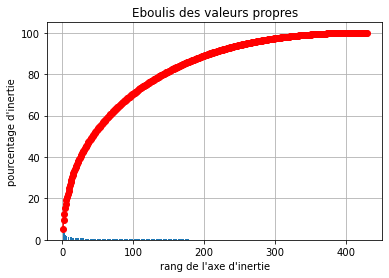

In [121]:
from sklearn import decomposition
from sklearn.decomposition import PCA
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.grid()
    plt.show(block=False)
    
pca = decomposition.PCA(n_components=429)
pca.fit(X)
display_scree_plot(pca)

In [122]:
pca = decomposition.PCA(n_components=200)
pca.fit(X)
X_proj = pca.transform(X)
print(X_proj.shape)

(1050, 200)


In [123]:
X_trans=tsne.fit_transform(X_proj)

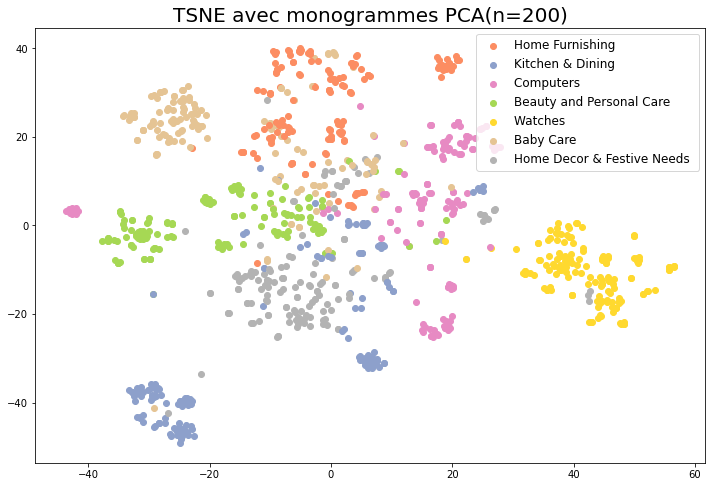

In [124]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(12,8))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '),loc='upper right',prop={'size':12})
plt.title('TSNE avec monogrammes PCA(n=200)',size=20)
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

In [125]:
tf=TfidfVectorizer(tokenizer=nltk.word_tokenize,stop_words=sw2,ngram_range=(2,2))
bigr=tf.fit_transform(bags['words_string'])

/home/samuel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [126]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2)

In [127]:
X_trans=tsne.fit_transform(bigr)

In [128]:
X_trans

array([[ 27.43215 , -52.061604],
       [ 35.94681 ,  33.08937 ],
       [ 21.83047 ,  26.430595],
       ...,
       [ 15.275902,  11.075086],
       [ 20.127508,  13.860264],
       [ 18.48033 ,  10.191154]], dtype=float32)

In [129]:
#C'est beaucoup mieux.

In [130]:
#on va tenter les PCA et NMF voir ce que cela donne:


In [131]:
#C'est pas mal mais on va essayer de réduire la dimension:
X=bigr.toarray()

In [132]:
print(X)
print(X.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1050, 2881)


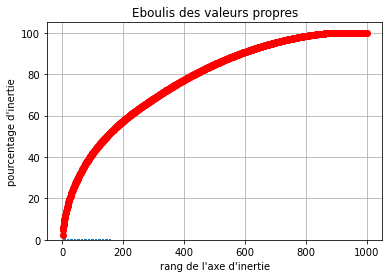

In [133]:
from sklearn import decomposition
from sklearn.decomposition import PCA
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.grid()
    plt.show(block=False)
    
pca = decomposition.PCA(n_components=1000)
pca.fit(X)
display_scree_plot(pca)

In [134]:
pca = decomposition.PCA(n_components=800)
pca.fit(X)
X_proj = pca.transform(X)
print(X_proj.shape)

(1050, 800)


In [135]:
X_trans=tsne.fit_transform(X_proj)

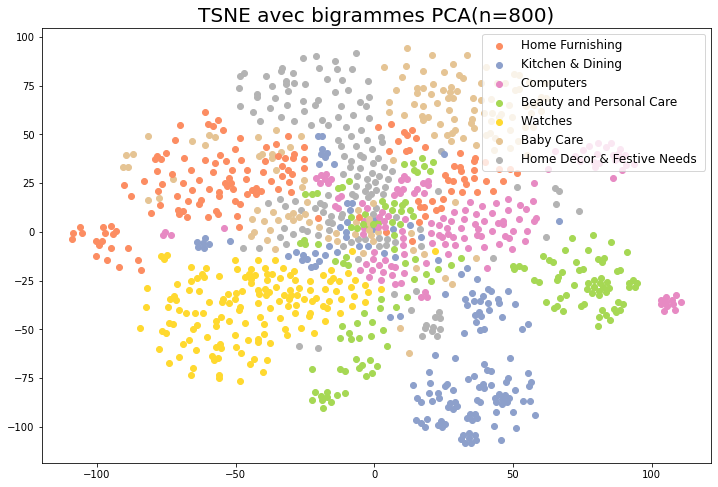

In [136]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(12,8))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '),loc='upper right',prop={'size':12})
plt.title('TSNE avec bigrammes PCA(n=800)',size=20)
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

# On essaye juste avec le nom

In [137]:
#Ca y est j'ai récupéré tous les mots qui m'intéréssaient
#je les concatène:
words=text_name.lower()

In [138]:
#On va passer par regex pour supprimer les nombres seuls et les ponctuations 
#??(Je veux conserver les 4d ou A5)??
import nltk
sw = set()
sw.update(tuple(nltk.corpus.stopwords.words('english')))
tokenizer = nltk.RegexpTokenizer(r'[A-Za-z0-9]{2,}')
corpus=tokenizer.tokenize(words)

In [139]:
len(corpus)

7314

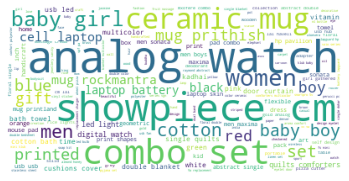

In [140]:
#Je regarde les fréquences:


from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=sw, background_color="white")
wordcloud.generate(" ".join(corpus))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [141]:
#rien ne saute aux yeux

# Nettoyage complémentaire

In [142]:
#On va comparer plusieurs options sur qq lignes du tableau pour sélectionner celui qui nous semble le plus
#pertinent:
text_data.head(1)

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   

                               product_category_tree  retail_price  \
0  [, Home Furnishing ,  Curtains & Accessories ,...        1899.0   

   discounted_price                                        description  \
0             899.0  Key Features of Elegance Polyester Multicolor ...   

      brand                             product_specifications  \
0  Elegance  {"product_specification"=>[{"key"=>"Brand", "v...   

        categorie 1               categorie 2 categorie 3  \
0  Home Furnishing    Curtains & Accessories    Curtains    

                                         categorie 4 categorie 5 categorie 6  \
0   Elegance Polyester Multicolor Abstract Eyelet...                           

  categorie 7 categorie 8                                       words_string  
0                          elegance polyester multicolor abstract eyelet ...

In [143]:
text_data.isnull().sum()

uniq_id                     0
product_url                 0
product_name                0
product_category_tree       0
retail_price                1
discounted_price            1
description                 0
brand                     338
product_specifications      1
categorie 1                 0
categorie 2                 0
categorie 3                 0
categorie 4                 0
categorie 5                 0
categorie 6                 0
categorie 7                 0
categorie 8                 0
words_string                0
dtype: int64

In [144]:
#On commence par regrouper dans une colonne l'ensemble des mots de chaque ligne dont on a enlevé les stopwords:

def cleaning(name):
    name_clean = name
    words = ' '.join([name_clean])
    words_clean = re.sub('[^A-Za-z ]',' ', words) #au final j'enlève les mots avec des nombres
    words_clean = re.sub('\s+',' ', words_clean) #j'enlève les espaces en trop
    words_list = words_clean.split(' ')
    return ' '.join([w.lower() for w in words_list if w not in sw])

In [145]:
text_data['words_string'] = np.vectorize(cleaning)(text_data['product_name'])
text_data.head()

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   
1  7b72c92c2f6c40268628ec5f14c6d590   
2  64d5d4a258243731dc7bbb1eef49ad74   
3  d4684dcdc759dd9cdf41504698d737d8   
4  6325b6870c54cd47be6ebfbffa620ec7   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree  retail_price  \
0  [, Home Furnishing ,  Curtains & Accessories ,...        1899.0   
1  [, Baby Care ,  Baby Bath & Skin ,  Baby Bath ...         600.0   
2  [, Baby Care ,  Baby Bath & Skin ,  Baby Bath ...           NaN   
3  [, Home Furnishing ,  Bed Linen ,  Bedsheets ,...        2699.0   
4  [, Home Furnishing ,  Bed Linen ,  Bedsheets ,...        2599.0   

   discounted_price                                        description  \
0             899.0  Key Features of Elegance Polyester Multicolor ...   
1             449.0  Specifications of Sathiyas Cotton Bath Towel (...   
2               NaN  Key Features of Eurospa Cotton Terry Face Towe...   
3            1299.0  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4             698.0  Key Features of Jaipur Print Cotton Floral Kin...   

                   brand                             product_specifications  \
0               Elegance  {"product_specification"=>[{"key"=>"Brand", "v...   
1               Sathiyas  {"product_specification"=>[{"key"=>"Machine Wa...   
2                Eurospa  {"product_specification"=>[{"key"=>"Material",...   
3  SANTOSH ROYAL FASHION  {"product_specification"=>[{"key"=>"Brand", "v...   
4           Jaipur Print  {"product_specification"=>[{"key"=>"Machine Wa...   

        categorie 1               categorie 2         categorie 3  \
0  Home Furnishing    Curtains & Accessories            Curtains    
1        Baby Care          Baby Bath & Skin    Baby Bath Towels    
2        Baby Care          Baby Bath & Skin    Baby Bath Towels    
3  Home Furnishing                 Bed Linen           Bedsheets    
4  Home Furnishing                 Bed Linen           Bedsheets    

                                         categorie 4  \
0   Elegance Polyester Multicolor Abstract Eyelet...   
1                         Sathiyas Baby Bath Towels    
2                          Eurospa Baby Bath Towels    
3                   SANTOSH ROYAL FASHION Bedsheets    
4                            Jaipur Print Bedsheets    

                                         categorie 5 categorie 6 categorie 7  \
0                                                                              
1   Sathiyas Cotton Bath Towel (3 Bath Towel, Red...                           
2   Eurospa Cotton Terry Face Towel Set (20 PIECE...                           
3   SANTOSH ROYAL FASHION Cotton Printed King siz...                           
4   Jaipur Print Cotton Floral King sized Double ...                           

  categorie 8                                       words_string  
0              elegance polyester multicolor abstract eyelet ...  
1                                     sathiyas cotton bath towel  
2                            eurospa cotton terry face towel set  
3              santosh royal fashion cotton printed king size...  
4              jaipur print cotton floral king sized double b...

In [146]:
new_corpus=' '.join(text_data['words_string'])

In [147]:
new_corpus

'elegance polyester multicolor abstract eyelet door curtain sathiyas cotton bath towel eurospa cotton terry face towel set santosh royal fashion cotton printed king sized double bedsheet jaipur print cotton floral king sized double bedsheet maserati time r analog watch for boys camerii wm elegance analog watch for men boys t star uft tsw bk br analog watch for boys alfajr wy b youth digital watch for men boys tag heuer cau ba formula analog watch for boys men calibro sw analog digital watch for men boys cartier w analog watch for boys men lois caron lcs analog watch for boys men titan sl analog watch for boys men srushti art jewelry megnet led sport blackred digital watch for men women boys girls escort e blk analog watch for men boys jack klein blackled digital watch for boys north moon iw fk silicone ion digital watch for boys girls women franck bella fb c analog watch for boys men ridas apl led black apple shape digital watch for boys skmei ad dark orange sports analog digital watch

In [148]:
#Il y a pas mal de mots soit fusionné soient issuent probablement des adresses url
#on va traiter cela
#je re tokenize
corpus=nltk.word_tokenize(new_corpus)

In [149]:
len(corpus)

7091

In [150]:
pd.Series(corpus).value_counts().describe()

count    2062.000000
mean        3.438894
std         9.468910
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       159.000000
dtype: float64

In [151]:
#on va commencer par enlever les long string qui ne veulent rien dire:
L=[]
for i in corpus:
    if len(i)>12 and i not in L:
        L.append(i)
L

['goldencollections',
 'intrferential',
 'electrotherapy',
 'illustrations',
 'pscychological',
 'multicoloured',
 'interiordesign',
 'international',
 'ruchikainternational',
 'jayenterprise',
 'multifunctional',
 'rajasthanikart',
 'msenterprises',
 'furnishingland',
 'mediterranean',
 'polypropylene']

In [152]:
def cleaning(x):
    #on traite les mots individuellement
    x=re.sub('goldencollections','golden collection',x)
    x=re.sub('intrferential','interferential',x)
    return x

In [153]:
new_corpus=cleaning(new_corpus)
corpus=nltk.word_tokenize(new_corpus)
L=[]
for i in corpus:
    if len(i)>12:
        L.append(i)
L

['interferential',
 'electrotherapy',
 'illustrations',
 'pscychological',
 'multicoloured',
 'interiordesign',
 'international',
 'international',
 'international',
 'ruchikainternational',
 'ruchikainternational',
 'jayenterprise',
 'multifunctional',
 'rajasthanikart',
 'msenterprises',
 'international',
 'furnishingland',
 'furnishingland',
 'furnishingland',
 'mediterranean',
 'polypropylene']

In [154]:
#On applique ce cleaning à la colonne de texte:
text_data['words_string']=text_data['words_string'].apply(lambda x:cleaning(x))

##  Stemming/Lemmatization

In [155]:
test_data=text_data.sample(10)
test_data['categorie 1'].unique()

array(['Home Decor & Festive Needs ', 'Beauty and Personal Care ',
       'Home Furnishing ', 'Computers ', 'Baby Care ',
       'Kitchen & Dining '], dtype=object)

In [156]:
#On a toutes les catégories
#on récupère le texte
test='\n'.join(test_data['words_string'])

In [157]:
test

'bharatcraft showpiece cm\nwild stone charge surge combo set\nrama floral single quilts comforters yellow\nlushomes plain back cushion\nhako w magsafe laptop charger for apple macbook pro ma lla adapter\ndoraemon gift family ceramic coffee mug multicolour mug ml\ntitrit baby girl gathered dress\nmiracle retail bonsai wild plant artificial plant pot\nnutcase sticker wrap design north ml bottle\naroma comfort polyester blue floral eyelet long door curtain'

In [158]:
#testons plusieurs Stemmer et voyons ce que ça donne:

#Stemmer
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer

stem=LancasterStemmer()

def modif(texte,stemmer):
    count=0
    dico={}
    for mot in nltk.word_tokenize(texte):
        stemm=stemmer
        m=stemm.stem(mot)
        if m!=mot:
            count+=1
            if m in dico:
                if mot not in dico[m]:
                    dico[m].append(mot)
            else :
                dico[m]=[mot]
    
    return len(dico),count
               



In [159]:
L=[LancasterStemmer(),PorterStemmer(),SnowballStemmer("english")]
Name=['Lancaster','Porter','Snowball']

for i in range(3):
    print(Name[i],modif(test,L[i]))

Lancaster (29, 31)
Porter (20, 20)
Snowball (20, 20)


In [160]:
#Lancaster parait plus efficace mais regardons les différences:
def modif2(texte):
    L=[LancasterStemmer(),PorterStemmer(),SnowballStemmer("english")]
    Name=['Lancaster','Porter','Snowball']
    dico={}
    for i in range(3):
        count=0
        for mot in nltk.word_tokenize(texte):
            stemm=L[i]
            m=stemm.stem(mot)
            if m!=mot:
                if mot in dico:
                    if Name[i] not in dico[mot]:
                        dico[mot][Name[i]]=m
                else:
                    dico[mot]={Name[i]:m}
    
    return dico


In [161]:
modif2(test)

{'showpiece': {'Lancaster': 'showpiec',
  'Porter': 'showpiec',
  'Snowball': 'showpiec'},
 'stone': {'Lancaster': 'ston'},
 'charge': {'Lancaster': 'charg', 'Porter': 'charg', 'Snowball': 'charg'},
 'surge': {'Lancaster': 'surg', 'Porter': 'surg', 'Snowball': 'surg'},
 'rama': {'Lancaster': 'ram'},
 'floral': {'Lancaster': 'flor'},
 'single': {'Lancaster': 'singl', 'Porter': 'singl', 'Snowball': 'singl'},
 'quilts': {'Lancaster': 'quilt', 'Porter': 'quilt', 'Snowball': 'quilt'},
 'comforters': {'Lancaster': 'comfort',
  'Porter': 'comfort',
  'Snowball': 'comfort'},
 'lushomes': {'Lancaster': 'lushom', 'Porter': 'lushom', 'Snowball': 'lushom'},
 'cushion': {'Lancaster': 'cush'},
 'magsafe': {'Lancaster': 'magsaf', 'Porter': 'magsaf', 'Snowball': 'magsaf'},
 'charger': {'Lancaster': 'charg'},
 'apple': {'Lancaster': 'appl', 'Porter': 'appl', 'Snowball': 'appl'},
 'adapter': {'Lancaster': 'adapt', 'Porter': 'adapt', 'Snowball': 'adapt'},
 'family': {'Lancaster': 'famy', 'Porter': 'famil

In [162]:
#On part sur Lancaster

In [163]:
#Voyons avec les Lemmetizer:
#Lemmetizer:
from nltk.stem import WordNetLemmatizer
from textblob import Word,TextBlob
from gensim.utils import lemmatize


lem=WordNetLemmatizer()
dico={}
countWN=0
countTB=0
countGEN=0
for t in test.split():
    if lem.lemmatize(t)!=t:
        countWN+=1
        if t not in dico:
            dico[t]={'WordNet':lem.lemmatize(t)}
    
    w = Word(t)
    if w.lemmatize()!=t:
        countTB+=1
        if t not in dico:
            dico[t]={'TextBlob':w.lemmatize()}
        else:
            dico[t]['TextBlob']=w.lemmatize()
            
print('Wordnet:',countWN,'\t','TextBlob',countTB)
print(dico)




Wordnet: 2 	 TextBlob 2
{'quilts': {'WordNet': 'quilt', 'TextBlob': 'quilt'}, 'comforters': {'WordNet': 'comforter', 'TextBlob': 'comforter'}}


In [164]:
#On a les même résultats
#On va essayer avant après:

lem=WordNetLemmatizer()
def modifapres(texte,stemmer):
    count,count2=0,0
    dico={}
    for mot in nltk.word_tokenize(texte):
        stemm=stemmer
        m=stemm.stem(mot)
        if m!=mot:
            count+=1
            if lem.lemmatize(m)!=m:
                count2+=1
        else:
            if lem.lemmatize(mot)!=mot:
                count2+=1

    return count,count2

def modifavant(texte,stemmer):
    
    count,count2=0,0
    
    dico={}
    for mot in nltk.word_tokenize(texte):
        m=lem.lemmatize(mot)
        stemm=stemmer
        if m!=mot:
            count2+=1
            st=stemm.stem(m)
            if st!=m:
                count+=1
        elif stemm.stem(mot)!=mot:
            count+=1
    return(count,count2)


In [165]:
L=[LancasterStemmer(),PorterStemmer(),SnowballStemmer("english")]
Name=['Lancaster','Porter','Snowball']

for i in range(3):
    print('avant',Name[i],modifavant(test,L[i]))
    print('apres',Name[i],modifapres(test,L[i]))

avant Lancaster (30, 2)
apres Lancaster (31, 0)
avant Porter (19, 2)
apres Porter (20, 0)
avant Snowball (19, 2)
apres Snowball (20, 0)


In [166]:
text_data.head(1)

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   

                               product_category_tree  retail_price  \
0  [, Home Furnishing ,  Curtains & Accessories ,...        1899.0   

   discounted_price                                        description  \
0             899.0  Key Features of Elegance Polyester Multicolor ...   

      brand                             product_specifications  \
0  Elegance  {"product_specification"=>[{"key"=>"Brand", "v...   

        categorie 1               categorie 2 categorie 3  \
0  Home Furnishing    Curtains & Accessories    Curtains    

                                         categorie 4 categorie 5 categorie 6  \
0   Elegance Polyester Multicolor Abstract Eyelet...                           

  categorie 7 categorie 8                                       words_string  
0                          elegance polyester multicolor abstract eyelet ...

In [167]:
#COnclusion on va d'abord faire un lemmetizer puis un stemmer
#On va essayer Lancaster puis Porter.
#on va essayer de tracer tout cela:
#D'abod avec une simple TF-IDF:

stemmer=LancasterStemmer()

def reduced_tokens(tokens, stemmer):
    #J'applique d'abord WordNetLemmatizer puis le stemmer
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(lem.lemmatize(item)))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = reduced_tokens(tokens, stemmer)
    return stems

bags=text_data[['categorie 1','words_string']].copy()


bags['words_string']=bags['words_string'].apply(lambda x:tokenize(x))
bags['words_string']=bags['words_string'].apply(lambda x:' '.join(x))

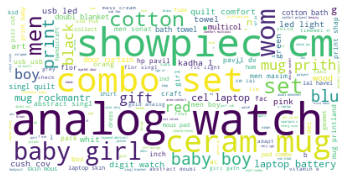

In [168]:
#On va encore un peu enrichir notre base de stopwords:

#On regarde à nouveau:
wordcloud.generate(" ".join(bags['words_string']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


#on garde rs par exemple, marque de composant électronique et cm qui peut représenter une discrimination entre catégorie


In [169]:
bags.head()

categorie 1                                       words_string
0  Home Furnishing   eleg polyest multicol abstract eyelet door cur...
1        Baby Care                           sathiya cotton bath towel
2        Baby Care                   eurosp cotton terry fac towel set
3  Home Furnishing   santosh roy fash cotton print king siz doubl b...
4  Home Furnishing      jaip print cotton flor king siz doubl bedsheet

In [170]:
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [171]:
bags['categorie 1'].unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

In [172]:
def cat(x):
    if x=='Home Furnishing ':
        return 1
    if x=='Kitchen & Dining ':
        return 2
    if x=='Computers ':
        return 3
    if x=='Beauty and Personal Care ':
        return 4
    if x=='Watches ':
        return 5
    if x=='Baby Care ':
        return 6
    else:
        return 7

In [173]:
bags['cluster']=bags['categorie 1'].apply(lambda x:cat(x))

In [174]:
bags['cluster'][i]

6

In [175]:
#On a donc exactement 150 item par catégorie
#regardons la fréquence de répartition des mots:
texte_complet=' '.join(bags['words_string'])
d={}
for i in nltk.word_tokenize(texte_complet):
    if i not in d:
        d[i]=1
    else:
        d[i]+=1

In [176]:
len(d)

1859

In [177]:
#On va supprimer les mots présents moins de 10 fois (non vraiment représentatif d'un groupe)
#On va aussi supprimer ceux présents plus de 600 fois

In [178]:
sw2=[]
for i in d.keys():
    if d[i]<5:
        sw2.append(i)
len(sw2)

1563

In [179]:
#On met à jour nos bag of wrods avec ces nouveaux stop words:
sw2+=sw

In [180]:
len(sw2)

1742

In [181]:
sw2=[]
for i in d.keys():
    if d[i]<5 or d[i]>300:
        sw2.append(i)
len(sw2)

1563

In [182]:
sw2

['eleg',
 'sathiya',
 'eurosp',
 'terry',
 'santosh',
 'maserat',
 'cameri',
 'wm',
 'star',
 'uft',
 'tsw',
 'bk',
 'br',
 'alfajr',
 'wy',
 'tag',
 'heu',
 'cau',
 'ba',
 'formul',
 'calibro',
 'sw',
 'carty',
 'loi',
 'caron',
 'lcs',
 'tit',
 'srusht',
 'jewelry',
 'megnet',
 'blackr',
 'escort',
 'blk',
 'jack',
 'klein',
 'blackl',
 'nor',
 'moon',
 'iw',
 'fk',
 'silicon',
 'ion',
 'franck',
 'bell',
 'rida',
 'apl',
 'skmei',
 'ad',
 'now',
 'sp',
 'ethn',
 'dg',
 'fastrack',
 'wq',
 'qibl',
 'compass',
 'disney',
 'dw',
 'viz',
 'elantr',
 'marvel',
 'lenco',
 'bdblue',
 'tango',
 'sign',
 'gm',
 'wht',
 'embroid',
 'diw',
 'hous',
 'thi',
 'queen',
 'riv',
 'fre',
 'mat',
 'loop',
 'shag',
 'bathm',
 'ri',
 'myesquir',
 'burn',
 'lemongrass',
 'liquid',
 'air',
 'fresh',
 'dungr',
 'ducjug',
 'ducgl',
 'jug',
 'bft',
 'jmd',
 'krip',
 'burt',
 'bee',
 'repair',
 'she',
 'grapefruit',
 'deep',
 'condit',
 'keep',
 'calm',
 'dap',
 'leagu',
 'legend',
 'suav',
 'everlast',
 'su

In [183]:
#On met à jour nos bag of wrods avec ces nouveaux stop words:
sw2+=sw

In [184]:
len(sw2)

1742

In [185]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize,stop_words=sw2)
values = tfidf.fit_transform(bags['words_string'])


/home/samuel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [186]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2)

In [187]:
X_trans=tsne.fit_transform(values)

In [188]:
X_trans

array([[-18.692596 , -23.660599 ],
       [  3.1998792, -37.148067 ],
       [  7.3884854, -37.833523 ],
       ...,
       [-13.621034 , -12.342647 ],
       [-14.607579 , -10.240162 ],
       [-14.708107 , -12.114184 ]], dtype=float32)

In [189]:
#c'est un peu moins mélangé, on va tenter les PCA et NMF voir ce que cela donne:


In [190]:
#C'est pas mal mais on va essayer de réduire la dimension:
X=values.toarray()

In [191]:
print(X)
print(X.shape)

[[0.36566341 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(1050, 280)


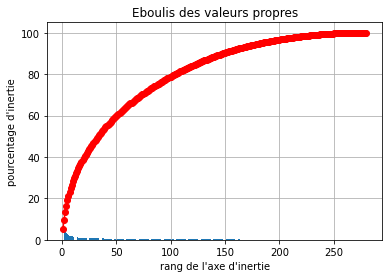

In [192]:
from sklearn import decomposition
from sklearn.decomposition import PCA
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.grid()
    plt.show(block=False)
    
pca = decomposition.PCA(n_components=280)
pca.fit(X)
display_scree_plot(pca)

In [193]:
pca = decomposition.PCA(n_components=150)
pca.fit(X)
X_proj = pca.transform(X)
print(X_proj.shape)

(1050, 150)


In [194]:
X_trans=tsne.fit_transform(X_proj)

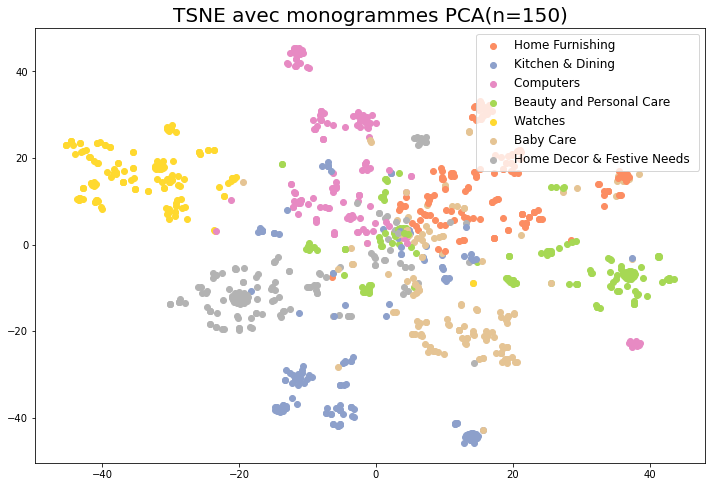

In [195]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(12,8))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '),loc='upper right',prop={'size':12})
plt.title('TSNE avec monogrammes PCA(n=150)',size=20)
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

In [196]:
tf=TfidfVectorizer(tokenizer=nltk.word_tokenize,stop_words=sw2,ngram_range=(2,2))
bigr=tf.fit_transform(bags['words_string'])

/home/samuel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [197]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2)

In [198]:
X_trans=tsne.fit_transform(bigr)

In [199]:
X_trans

array([[ -9.3550625 ,  -3.2135103 ],
       [ 16.575014  ,  35.604416  ],
       [-11.710173  , -17.631565  ],
       ...,
       [  0.05549837,  -1.6685088 ],
       [-14.903067  , -15.18542   ],
       [-16.84761   , -12.488477  ]], dtype=float32)

In [200]:
#C'est pas mal mais on va essayer de réduire la dimension:
X=bigr.toarray()

In [201]:
print(X)
print(X.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1050, 1314)


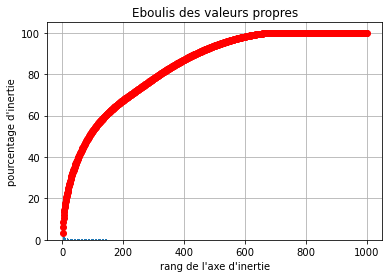

In [202]:
from sklearn import decomposition
from sklearn.decomposition import PCA
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.grid()
    plt.show(block=False)
    
pca = decomposition.PCA(n_components=1000)
pca.fit(X)
display_scree_plot(pca)

In [203]:
pca = decomposition.PCA(n_components=600)
pca.fit(X)
X_proj = pca.transform(X)
print(X_proj.shape)

(1050, 600)


In [204]:
X_trans=tsne.fit_transform(X_proj)

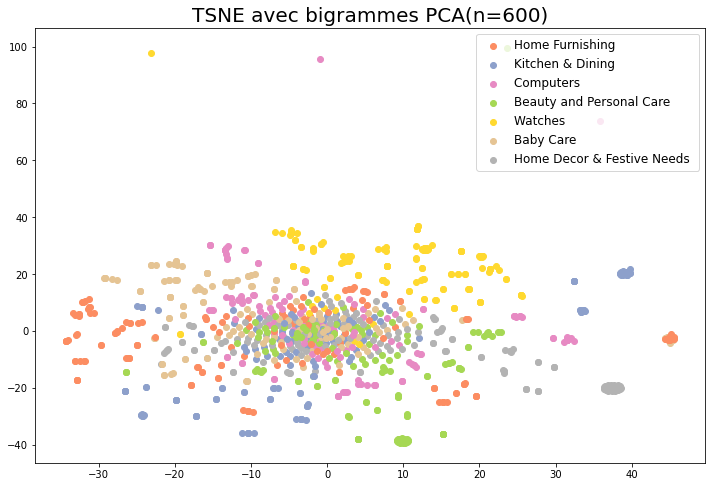

In [205]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(12,8))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '),loc='upper right',prop={'size':12})
plt.title('TSNE avec bigrammes PCA(n=600)',size=20)
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

In [206]:
#c'est toujours pas fameux mais c'est un peu mieux

In [207]:
#On essai les tri-gram:


In [208]:
tf=TfidfVectorizer(tokenizer=nltk.word_tokenize,stop_words=sw2,ngram_range=(3,3))
trigr=tf.fit_transform(bags['words_string'])

/home/samuel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [209]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2)

In [210]:
X_trans=tsne.fit_transform(trigr)

In [211]:
X_trans

array([[  9.937542 , -14.562222 ],
       [-47.99627  ,  11.50109  ],
       [ 27.61933  , -15.251285 ],
       ...,
       [  7.1426163,   4.107369 ],
       [ 31.506723 , -11.112381 ],
       [-24.112312 ,  -7.7452426]], dtype=float32)

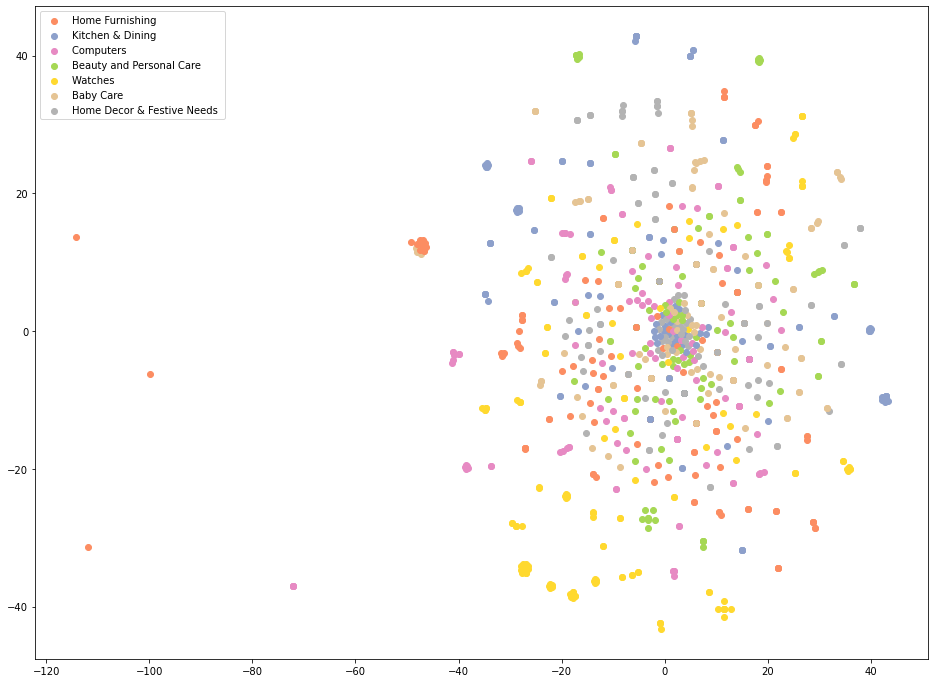

In [212]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(16,12))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '))
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

In [213]:
#C'est moins bien

# On fait un dernier essai juste avec les spécifications

In [214]:
#Ca y est j'ai récupéré tous les mots qui m'intéréssaient
#je les concatène:
words=spec_words.lower()

In [215]:
#On va passer par regex pour supprimer les nombres seuls et les ponctuations 
#??(Je veux conserver les 4d ou A5)??
import nltk
sw = set()
sw.update(tuple(nltk.corpus.stopwords.words('english')))
tokenizer = nltk.RegexpTokenizer(r'[A-Za-z0-9]{2,}')
corpus=tokenizer.tokenize(words)

In [216]:
len(corpus)

11257

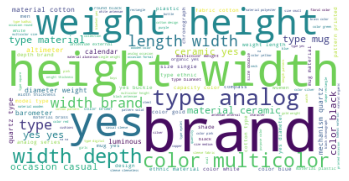

In [217]:
#Je regarde les fréquences:


from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=sw, background_color="white")
wordcloud.generate(" ".join(corpus))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [218]:
freq_words=['brand','width','weight','height','type','yes','length','depth','color',\
            'black','women','white','multicolor','occasion','men','diameter','round']

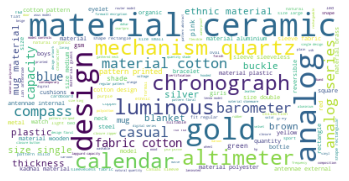

In [219]:
sw.update(tuple(freq_words))

#On regarde à nouveau:
wordcloud.generate(" ".join(corpus))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()



In [220]:
#rien ne saute aux yeux

# Nettoyage complémentaire

In [221]:
#On va comparer plusieurs options sur qq lignes du tableau pour sélectionner celui qui nous semble le plus
#pertinent:
text_data.head(1)

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   

                               product_category_tree  retail_price  \
0  [, Home Furnishing ,  Curtains & Accessories ,...        1899.0   

   discounted_price                                        description  \
0             899.0  Key Features of Elegance Polyester Multicolor ...   

      brand                             product_specifications  \
0  Elegance  {"product_specification"=>[{"key"=>"Brand", "v...   

        categorie 1               categorie 2 categorie 3  \
0  Home Furnishing    Curtains & Accessories    Curtains    

                                         categorie 4 categorie 5 categorie 6  \
0   Elegance Polyester Multicolor Abstract Eyelet...                           

  categorie 7 categorie 8                                       words_string  
0                          elegance polyester multicolor abstract eyelet ...

In [222]:
text_data.isnull().sum()

uniq_id                     0
product_url                 0
product_name                0
product_category_tree       0
retail_price                1
discounted_price            1
description                 0
brand                     338
product_specifications      1
categorie 1                 0
categorie 2                 0
categorie 3                 0
categorie 4                 0
categorie 5                 0
categorie 6                 0
categorie 7                 0
categorie 8                 0
words_string                0
dtype: int64

In [223]:
#On commence par regrouper dans une colonne l'ensemble des mots de chaque ligne dont on a enlevé les stopwords:

def cleaning(specs):
    spec_clean=spec(specs)
    words = ' '.join([spec_clean])
    words_clean = re.sub('[^A-Za-z ]',' ', words) #au final j'enlève les mots avec des nombres
    words_clean = re.sub('\s+',' ', words_clean) #j'enlève les espaces en trop
    words_list = words_clean.split(' ')
    return ' '.join([w.lower() for w in words_list if w.lower() not in sw])

In [224]:
text_data['words_string'] = np.vectorize(cleaning)(text_data['product_specifications'].fillna(''))
text_data.head()

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   
1  7b72c92c2f6c40268628ec5f14c6d590   
2  64d5d4a258243731dc7bbb1eef49ad74   
3  d4684dcdc759dd9cdf41504698d737d8   
4  6325b6870c54cd47be6ebfbffa620ec7   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree  retail_price  \
0  [, Home Furnishing ,  Curtains & Accessories ,...        1899.0   
1  [, Baby Care ,  Baby Bath & Skin ,  Baby Bath ...         600.0   
2  [, Baby Care ,  Baby Bath & Skin ,  Baby Bath ...           NaN   
3  [, Home Furnishing ,  Bed Linen ,  Bedsheets ,...        2699.0   
4  [, Home Furnishing ,  Bed Linen ,  Bedsheets ,...        2599.0   

   discounted_price                                        description  \
0             899.0  Key Features of Elegance Polyester Multicolor ...   
1             449.0  Specifications of Sathiyas Cotton Bath Towel (...   
2               NaN  Key Features of Eurospa Cotton Terry Face Towe...   
3            1299.0  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4             698.0  Key Features of Jaipur Print Cotton Floral Kin...   

                   brand                             product_specifications  \
0               Elegance  {"product_specification"=>[{"key"=>"Brand", "v...   
1               Sathiyas  {"product_specification"=>[{"key"=>"Machine Wa...   
2                Eurospa  {"product_specification"=>[{"key"=>"Material",...   
3  SANTOSH ROYAL FASHION  {"product_specification"=>[{"key"=>"Brand", "v...   
4           Jaipur Print  {"product_specification"=>[{"key"=>"Machine Wa...   

        categorie 1               categorie 2         categorie 3  \
0  Home Furnishing    Curtains & Accessories            Curtains    
1        Baby Care          Baby Bath & Skin    Baby Bath Towels    
2        Baby Care          Baby Bath & Skin    Baby Bath Towels    
3  Home Furnishing                 Bed Linen           Bedsheets    
4  Home Furnishing                 Bed Linen           Bedsheets    

                                         categorie 4  \
0   Elegance Polyester Multicolor Abstract Eyelet...   
1                         Sathiyas Baby Bath Towels    
2                          Eurospa Baby Bath Towels    
3                   SANTOSH ROYAL FASHION Bedsheets    
4                            Jaipur Print Bedsheets    

                                         categorie 5 categorie 6 categorie 7  \
0                                                                              
1   Sathiyas Cotton Bath Towel (3 Bath Towel, Red...                           
2   Eurospa Cotton Terry Face Towel Set (20 PIECE...                           
3   SANTOSH ROYAL FASHION Cotton Printed King siz...                           
4   Jaipur Print Cotton Floral King sized Double ...                           

  categorie 8                                       words_string  
0                 elegance door eyelet duster material polyester  
1              material cotton design sathiyas gsm asvtwl siz...  
2              material design shuvam eurospa gsm shuvam pcft...  
3                                flat material cotton size king   
4                  flat jaipur material cotton jaipur size king

In [225]:
new_corpus=' '.join(text_data['words_string'])

In [226]:
new_corpus

'elegance door eyelet duster material polyester material cotton design sathiyas gsm asvtwl size mediam  material design shuvam eurospa gsm shuvam pcftsetassorted shuvam pcftsetassorted size small assorted  flat material cotton size king  flat jaipur material cotton jaipur size king  chronograph altimeter barometer compass calendar luminous analog r boys oval green grey chronograph altimeter barometer compass calendar luminous mechanism quartz analog series elegance wm formal thickness metal metal mettalic buckle chronograph altimeter barometer compass calendar luminous mechanism quartz analog casual boys analog cardboard linked brown buckle watch chronograph altimeter tourbillon calendar luminous barometer moonphase compass light gps thickness mechanism quartz digital series youth wy b battery plastic ribber mesh plastic buckle watch chronograph altimeter barometer compass calendar luminous mechanism quartz analog series bracelet steel clasp chronograph altimeter barometer compass ligh

In [227]:
#Il y a pas mal de mots soit fusionné soient issuent probablement des adresses url
#on va traiter cela
#je re tokenize
corpus=nltk.word_tokenize(new_corpus)

In [228]:
len(corpus)

5812

In [229]:
pd.Series(corpus).value_counts().describe()

count    1000.000000
mean        5.812000
std        18.713868
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       410.000000
dtype: float64

In [230]:
#on va commencer par enlever les long string qui ne veulent rien dire:
L=[]
for i in corpus:
    if len(i)>12 and i not in L:
        L.append(i)
L

['pcftsetassorted',
 'certification',
 'tabledecorativebowl',
 'polypropylene',
 'interiordesign',
 'mothersdaytile',
 'ruchikainternational',
 'jayenterprise',
 'brilliantcolor',
 'polycarbonate',
 'rajasthanikart',
 'srprbhganfrovl',
 'ccsmallfloral',
 'zeflowerbtton',
 'bttonflwrbeigerust',
 'msenterprises',
 'furnishingland']

In [231]:
def cleaning(x):
    #on traite les mots individuellement
    x=re.sub(r'pcftsetassorted','pc ft set assorted',x)
    x=re.sub('goldencollections','golden collection',x)
    x=re.sub('intrferential','interferential',x)
    x=re.sub('tabledecorativebowl','table decorative bowl',x)
    x=re.sub('interiorsdesign','interior design',x)
    x=re.sub('mothersdaytile','mother day tile',x)
    x=re.sub('brilliantcolor','brilliant color',x)
    x=re.sub('srprbhganfrovl','',x)
    x=re.sub('ccsmallfloral','cc small floral',x)
    x=re.sub('bttonflwrbeigerust','button flower',x)
    x=re.sub('zeflowerbtton','flower button',x)
    return x

In [232]:
new_corpus=cleaning(new_corpus)
corpus=nltk.word_tokenize(new_corpus)
L=[]
for i in corpus:
    if len(i)>12:
        L.append(i)
L

['certification',
 'polypropylene',
 'interiordesign',
 'ruchikainternational',
 'ruchikainternational',
 'jayenterprise',
 'certification',
 'certification',
 'certification',
 'certification',
 'certification',
 'certification',
 'certification',
 'certification',
 'certification',
 'certification',
 'polycarbonate',
 'rajasthanikart',
 'msenterprises',
 'furnishingland',
 'furnishingland',
 'furnishingland',
 'polypropylene']

In [233]:
#On applique ce cleaning à la colonne de texte:
text_data['words_string']=text_data['words_string'].apply(lambda x:cleaning(x))

##  Stemming/Lemmatization

In [234]:
test_data=text_data.sample(10)
test_data['categorie 1'].unique()

array(['Baby Care ', 'Beauty and Personal Care ', 'Home Furnishing ',
       'Watches ', 'Kitchen & Dining ', 'Computers '], dtype=object)

In [235]:
#On a toutes les catégories
#on récupère le texte
test='\n'.join(test_data['words_string'])

In [236]:
test

'material cotton design embriodery gsm boys size medium\n\nmaterial cotton pattern embroidered\nfabric cotton pattern printed\ndigital megnet led sport blackred rectangle\nocean vglass capacity clear material glass multipurpose disposable \nmug material ceramic\nrouter airtel model damage antennae\nchronograph altimeter barometer compass calendar luminous mechanism quartz analog series goldp casual plastic gold gold watch\nflexible memore material silicon rechargeable'

In [237]:
#testons plusieurs Stemmer et voyons ce que ça donne:

#Stemmer
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer

stem=LancasterStemmer()

def modif(texte,stemmer):
    count=0
    dico={}
    for mot in nltk.word_tokenize(texte):
        stemm=stemmer
        m=stemm.stem(mot)
        if m!=mot:
            count+=1
            if m in dico:
                if mot not in dico[m]:
                    dico[m].append(mot)
            else :
                dico[m]=[mot]
    
    return len(dico),count
               



In [238]:
L=[LancasterStemmer(),PorterStemmer(),SnowballStemmer("english")]
Name=['Lancaster','Porter','Snowball']

for i in range(3):
    print(Name[i],modif(test,L[i]))

Lancaster (29, 33)
Porter (22, 26)
Snowball (22, 26)


In [239]:
#Lancaster parait plus efficace mais regardons les différences:
def modif2(texte):
    L=[LancasterStemmer(),PorterStemmer(),SnowballStemmer("english")]
    Name=['Lancaster','Porter','Snowball']
    dico={}
    for i in range(3):
        count=0
        for mot in nltk.word_tokenize(texte):
            stemm=L[i]
            m=stemm.stem(mot)
            if m!=mot:
                if mot in dico:
                    if Name[i] not in dico[mot]:
                        dico[mot][Name[i]]=m
                else:
                    dico[mot]={Name[i]:m}
    
    return dico


In [240]:
modif2(test)

{'material': {'Lancaster': 'mat', 'Porter': 'materi', 'Snowball': 'materi'},
 'boys': {'Lancaster': 'boy', 'Porter': 'boy', 'Snowball': 'boy'},
 'size': {'Lancaster': 'siz'},
 'medium': {'Lancaster': 'med'},
 'embroidered': {'Lancaster': 'embroid',
  'Porter': 'embroid',
  'Snowball': 'embroid'},
 'fabric': {'Lancaster': 'fabr'},
 'printed': {'Lancaster': 'print', 'Porter': 'print', 'Snowball': 'print'},
 'digital': {'Lancaster': 'digit', 'Porter': 'digit', 'Snowball': 'digit'},
 'blackred': {'Lancaster': 'blackr', 'Porter': 'blackr', 'Snowball': 'blackr'},
 'rectangle': {'Lancaster': 'rectangl',
  'Porter': 'rectangl',
  'Snowball': 'rectangl'},
 'ocean': {'Lancaster': 'oc'},
 'capacity': {'Lancaster': 'capac', 'Porter': 'capac', 'Snowball': 'capac'},
 'multipurpose': {'Lancaster': 'multipurpos',
  'Porter': 'multipurpos',
  'Snowball': 'multipurpos'},
 'disposable': {'Lancaster': 'dispos',
  'Porter': 'dispos',
  'Snowball': 'dispos'},
 'ceramic': {'Lancaster': 'ceram', 'Porter': 'ce

In [241]:
#On part sur Lancaster

In [242]:
#Voyons avec les Lemmetizer:
#Lemmetizer:
from nltk.stem import WordNetLemmatizer
from textblob import Word,TextBlob
from gensim.utils import lemmatize


lem=WordNetLemmatizer()
dico={}
countWN=0
countTB=0
countGEN=0
for t in test.split():
    if lem.lemmatize(t)!=t:
        countWN+=1
        if t not in dico:
            dico[t]={'WordNet':lem.lemmatize(t)}
    
    w = Word(t)
    if w.lemmatize()!=t:
        countTB+=1
        if t not in dico:
            dico[t]={'TextBlob':w.lemmatize()}
        else:
            dico[t]['TextBlob']=w.lemmatize()
            
print('Wordnet:',countWN,'\t','TextBlob',countTB)
print(dico)




Wordnet: 2 	 TextBlob 2
{'boys': {'WordNet': 'boy', 'TextBlob': 'boy'}, 'antennae': {'WordNet': 'antenna', 'TextBlob': 'antenna'}}


In [243]:
#On a les même résultats
#On va essayer avant après:

lem=WordNetLemmatizer()
def modifapres(texte,stemmer):
    count,count2=0,0
    dico={}
    for mot in nltk.word_tokenize(texte):
        stemm=stemmer
        m=stemm.stem(mot)
        if m!=mot:
            count+=1
            if lem.lemmatize(m)!=m:
                count2+=1
        else:
            if lem.lemmatize(mot)!=mot:
                count2+=1

    return count,count2

def modifavant(texte,stemmer):
    
    count,count2=0,0
    
    dico={}
    for mot in nltk.word_tokenize(texte):
        m=lem.lemmatize(mot)
        stemm=stemmer
        if m!=mot:
            count2+=1
            st=stemm.stem(m)
            if st!=m:
                count+=1
        elif stemm.stem(mot)!=mot:
            count+=1
    return(count,count2)


In [244]:
L=[LancasterStemmer(),PorterStemmer(),SnowballStemmer("english")]
Name=['Lancaster','Porter','Snowball']

for i in range(3):
    print('avant',Name[i],modifavant(test,L[i]))
    print('apres',Name[i],modifapres(test,L[i]))

avant Lancaster (32, 2)
apres Lancaster (33, 1)
avant Porter (24, 2)
apres Porter (26, 0)
avant Snowball (24, 2)
apres Snowball (26, 0)


In [245]:
text_data.head(1)

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   

                               product_category_tree  retail_price  \
0  [, Home Furnishing ,  Curtains & Accessories ,...        1899.0   

   discounted_price                                        description  \
0             899.0  Key Features of Elegance Polyester Multicolor ...   

      brand                             product_specifications  \
0  Elegance  {"product_specification"=>[{"key"=>"Brand", "v...   

        categorie 1               categorie 2 categorie 3  \
0  Home Furnishing    Curtains & Accessories    Curtains    

                                         categorie 4 categorie 5 categorie 6  \
0   Elegance Polyester Multicolor Abstract Eyelet...                           

  categorie 7 categorie 8                                    words_string  
0                          elegance door eyelet duster material polyester

In [246]:
#COnclusion on va d'abord faire  un stemmer puis un un lemmetizer
#On va essayer Lancaster puis Porter.
#on va essayer de tracer tout cela:
#D'abod avec une simple TF-IDF:

stemmer=LancasterStemmer()

def reduced_tokens(tokens, stemmer):
    #J'applique d'abord WordNetLemmatizer puis le stemmer
    stemmed = []
    for item in tokens:
        stemmed.append(lem.lemmatize(stemmer.stem(item)))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = reduced_tokens(tokens, stemmer)
    return stems

bags=text_data[['categorie 1','words_string']].copy()


bags['words_string']=bags['words_string'].apply(lambda x:tokenize(x))
bags['words_string']=bags['words_string'].apply(lambda x:' '.join(x))

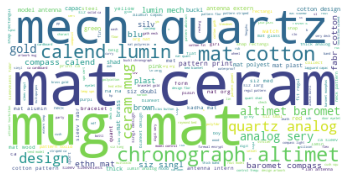

In [247]:
#On va encore un peu enrichir notre base de stopwords:

#On regarde à nouveau:
wordcloud.generate(" ".join(bags['words_string']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


#on garde rs par exemple, marque de composant électronique et cm qui peut représenter une discrimination entre catégorie


In [248]:
bags.head()

categorie 1                                       words_string
0  Home Furnishing                   eleg door eyelet dust mat polyest
1        Baby Care     mat cotton design sathiya gsm asvtwl siz mediam
2        Baby Care   mat design shuvam eurosp gsm shuvam pc ft set ...
3  Home Furnishing                            flat mat cotton siz king
4  Home Furnishing                  flat jaip mat cotton jaip siz king

In [249]:
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'black',
 'both',
 'brand',
 'but',
 'by',
 'can',
 'color',
 'couldn',
 "couldn't",
 'd',
 'depth',
 'diameter',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'height',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'length',
 'll',
 'm',
 'ma',
 'me',
 'men',
 'mightn',
 "mightn't",
 'more',
 'most',
 'multicolor',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'occasion',
 'of'

In [250]:
bags['categorie 1'].unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

In [251]:
def cat(x):
    if x=='Home Furnishing ':
        return 1
    if x=='Kitchen & Dining ':
        return 2
    if x=='Computers ':
        return 3
    if x=='Beauty and Personal Care ':
        return 4
    if x=='Watches ':
        return 5
    if x=='Baby Care ':
        return 6
    else:
        return 7

In [252]:
#On va supprimer les mots présents moins de 10 fois (non vraiment représentatif d'un groupe)
#On va aussi supprimer ceux présents plus de 600 fois

In [253]:
#On essai également en enlevant les mots présents plus de 600 fois voir ce que cela donne:

In [254]:
sw2=[]
for i in d.keys():
    if d[i]<5 or d[i]>100:
        sw2.append(i)
len(sw2)

1569

In [255]:
sw2

['eleg',
 'sathiya',
 'eurosp',
 'terry',
 'set',
 'santosh',
 'maserat',
 'analog',
 'watch',
 'for',
 'cameri',
 'wm',
 'star',
 'uft',
 'tsw',
 'bk',
 'br',
 'alfajr',
 'wy',
 'tag',
 'heu',
 'cau',
 'ba',
 'formul',
 'calibro',
 'sw',
 'carty',
 'loi',
 'caron',
 'lcs',
 'tit',
 'srusht',
 'jewelry',
 'megnet',
 'blackr',
 'escort',
 'blk',
 'jack',
 'klein',
 'blackl',
 'nor',
 'moon',
 'iw',
 'fk',
 'silicon',
 'ion',
 'franck',
 'bell',
 'rida',
 'apl',
 'skmei',
 'ad',
 'now',
 'sp',
 'ethn',
 'dg',
 'fastrack',
 'wq',
 'qibl',
 'compass',
 'disney',
 'dw',
 'viz',
 'elantr',
 'marvel',
 'lenco',
 'bdblue',
 'tango',
 'sign',
 'gm',
 'wht',
 'embroid',
 'diw',
 'hous',
 'thi',
 'queen',
 'riv',
 'fre',
 'mat',
 'loop',
 'shag',
 'bathm',
 'ri',
 'myesquir',
 'burn',
 'lemongrass',
 'liquid',
 'air',
 'fresh',
 'dungr',
 'ducjug',
 'ducgl',
 'jug',
 'bft',
 'jmd',
 'krip',
 'burt',
 'bee',
 'repair',
 'she',
 'grapefruit',
 'deep',
 'condit',
 'keep',
 'calm',
 'dap',
 'leagu',


In [256]:
#On met à jour nos bag of wrods avec ces nouveaux stop words:
sw2+=sw

In [257]:
len(sw2)

1765

In [258]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize,stop_words=sw2)
values = tfidf.fit_transform(bags['words_string'])


/home/samuel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [259]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2)

In [260]:
X_trans=tsne.fit_transform(values)

In [261]:
X_trans

array([[-13.839667 ,   5.4232287],
       [ -4.8092484,  -1.2376271],
       [ -1.4320223,  -2.7020895],
       ...,
       [  2.6306546, -10.773079 ],
       [ -9.244404 ,  -5.2040524],
       [  2.622975 , -10.773054 ]], dtype=float32)

In [262]:
#C'est pas mal mais on va essayer de réduire la dimension:
X=values.toarray()

In [263]:
print(X)
print(X.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1050, 480)


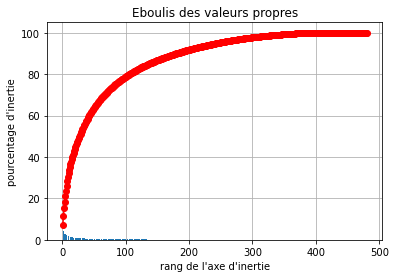

In [264]:
from sklearn import decomposition
from sklearn.decomposition import PCA
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.grid()
    plt.show(block=False)
    
pca = decomposition.PCA(n_components=480)
pca.fit(X)
display_scree_plot(pca)

In [265]:
pca = decomposition.PCA(n_components=150)
pca.fit(X)
X_proj = pca.transform(X)
print(X_proj.shape)

(1050, 150)


In [266]:
bags['cluster']=bags['categorie 1'].apply(lambda x:cat(x))

In [267]:
X_trans=tsne.fit_transform(X_proj)

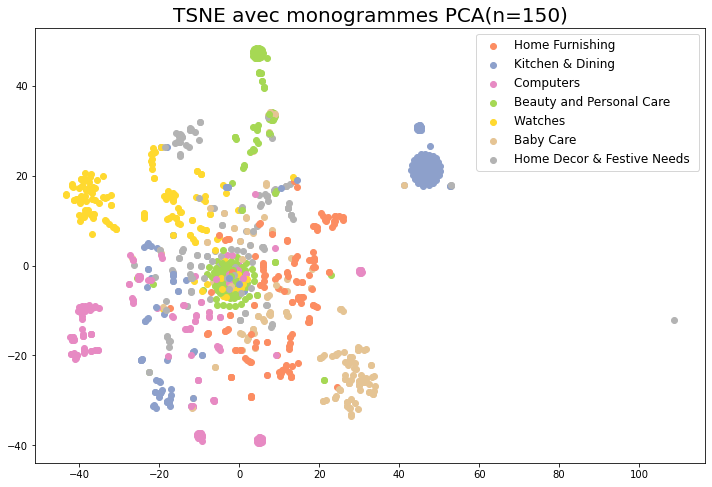

In [268]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(12,8))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '),loc='upper right',prop={'size':12})
plt.title('TSNE avec monogrammes PCA(n=150)',size=20)
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

In [269]:
tf=TfidfVectorizer(tokenizer=nltk.word_tokenize,stop_words=sw2,ngram_range=(2,2))
bigr=tf.fit_transform(bags['words_string'])

/home/samuel/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [270]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2)

In [271]:
X_trans=tsne.fit_transform(bigr)

In [272]:
X_trans

array([[15.440776 , 12.335673 ],
       [-1.027772 ,  7.58268  ],
       [ 2.6214955,  7.431212 ],
       ...,
       [ 6.5358424,  5.178716 ],
       [12.850261 , 11.193002 ],
       [ 2.6011865, 12.287068 ]], dtype=float32)

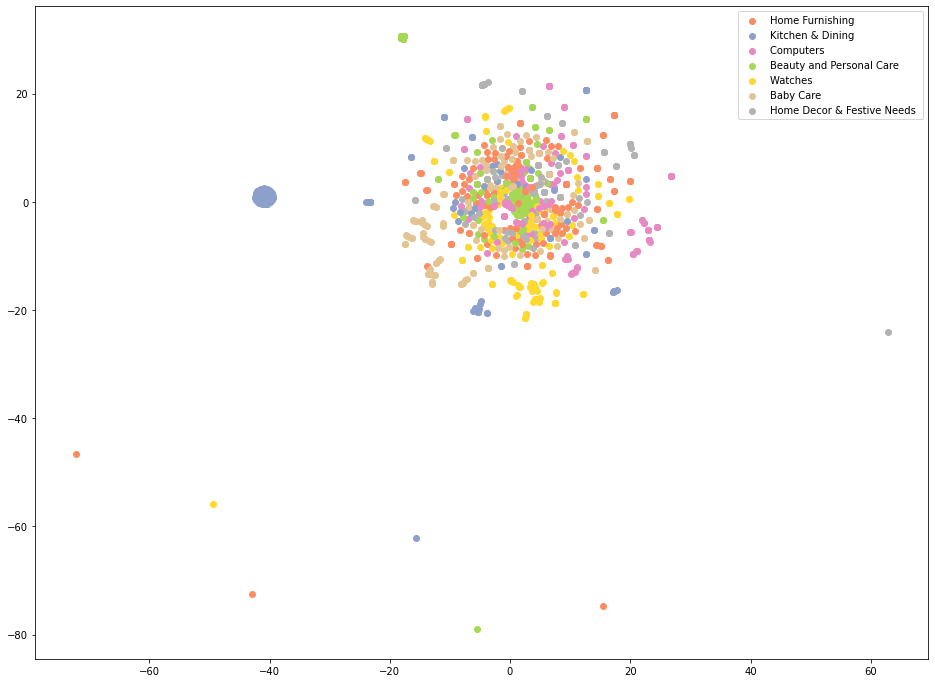

In [273]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(16,12))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '))
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()

In [274]:
#C'est beaucoup mieux.

In [275]:
#on va tenter les PCA et NMF voir ce que cela donne:


In [276]:
#C'est pas mal mais on va essayer de réduire la dimension:
X=bigr.toarray()

In [277]:
print(X)
print(X.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1050, 1300)


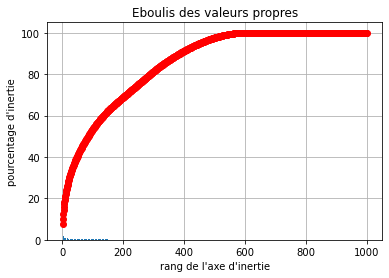

In [278]:
from sklearn import decomposition
from sklearn.decomposition import PCA
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.grid()
    plt.show(block=False)
    
pca = decomposition.PCA(n_components=1000)
pca.fit(X)
display_scree_plot(pca)

In [279]:
pca = decomposition.PCA(n_components=200)
pca.fit(X)
X_proj = pca.transform(X)
print(X_proj.shape)

(1050, 200)


In [280]:
X_trans=tsne.fit_transform(X_proj)

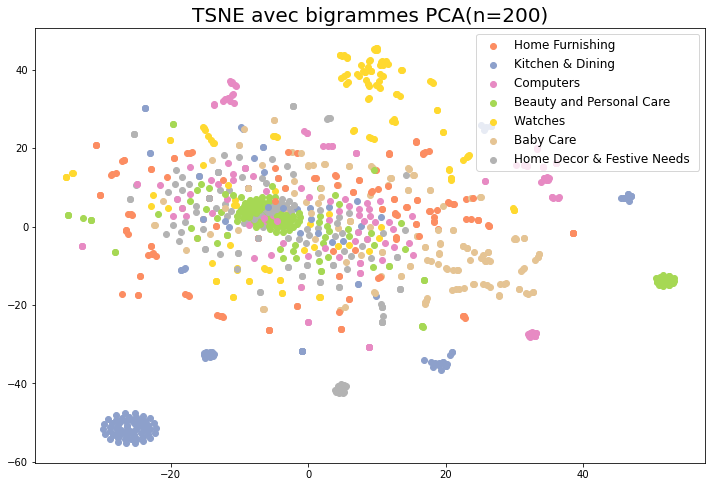

In [281]:
labels=['Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs ']
fig=plt.figure(figsize=(12,8))
for i in range(bags.shape[0]):
    cat=bags['cluster'][i]
    if cat==1:
        hf=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==2:
        k=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==3:
        c=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==4:
        b=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==5:
        w=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    elif cat==6:
        bab=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
    else:
        h=plt.scatter(X_trans[i,0],X_trans[i,1],color=plt.cm.Set2(cat))
plt.legend((hf,k,c,b,w,bab,h),('Home Furnishing ','Kitchen & Dining ','Computers ','Beauty and Personal Care ','Watches ','Baby Care ','Home Decor & Festive Needs '),loc='upper right',prop={'size':12})
plt.title('TSNE avec bigrammes PCA(n=200)',size=20)
plt.xlim=(-50,50)
plt.ylim=(-50,50)
plt.show()